# Importing Dataset

In [ ]:
!pip install scikeras
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from joblib import Parallel, delayed
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
!pip install pydot
!pip install graphviz
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.mixed_precision import set_global_policy
from tensorflow.keras import layers
from tensorflow.keras import Input, regularizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from scikeras.wrappers import KerasClassifier  # Use scikeras instead of tensorflow.keras.wrappers
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from IPython.display import display
!pip install keras-tuner
import keras_tuner as kt

Connect Google Colab to Kaggle to import databases: More details: https://www.youtube.com/watch?v=up8R4jT49Ak

Link dataset: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images

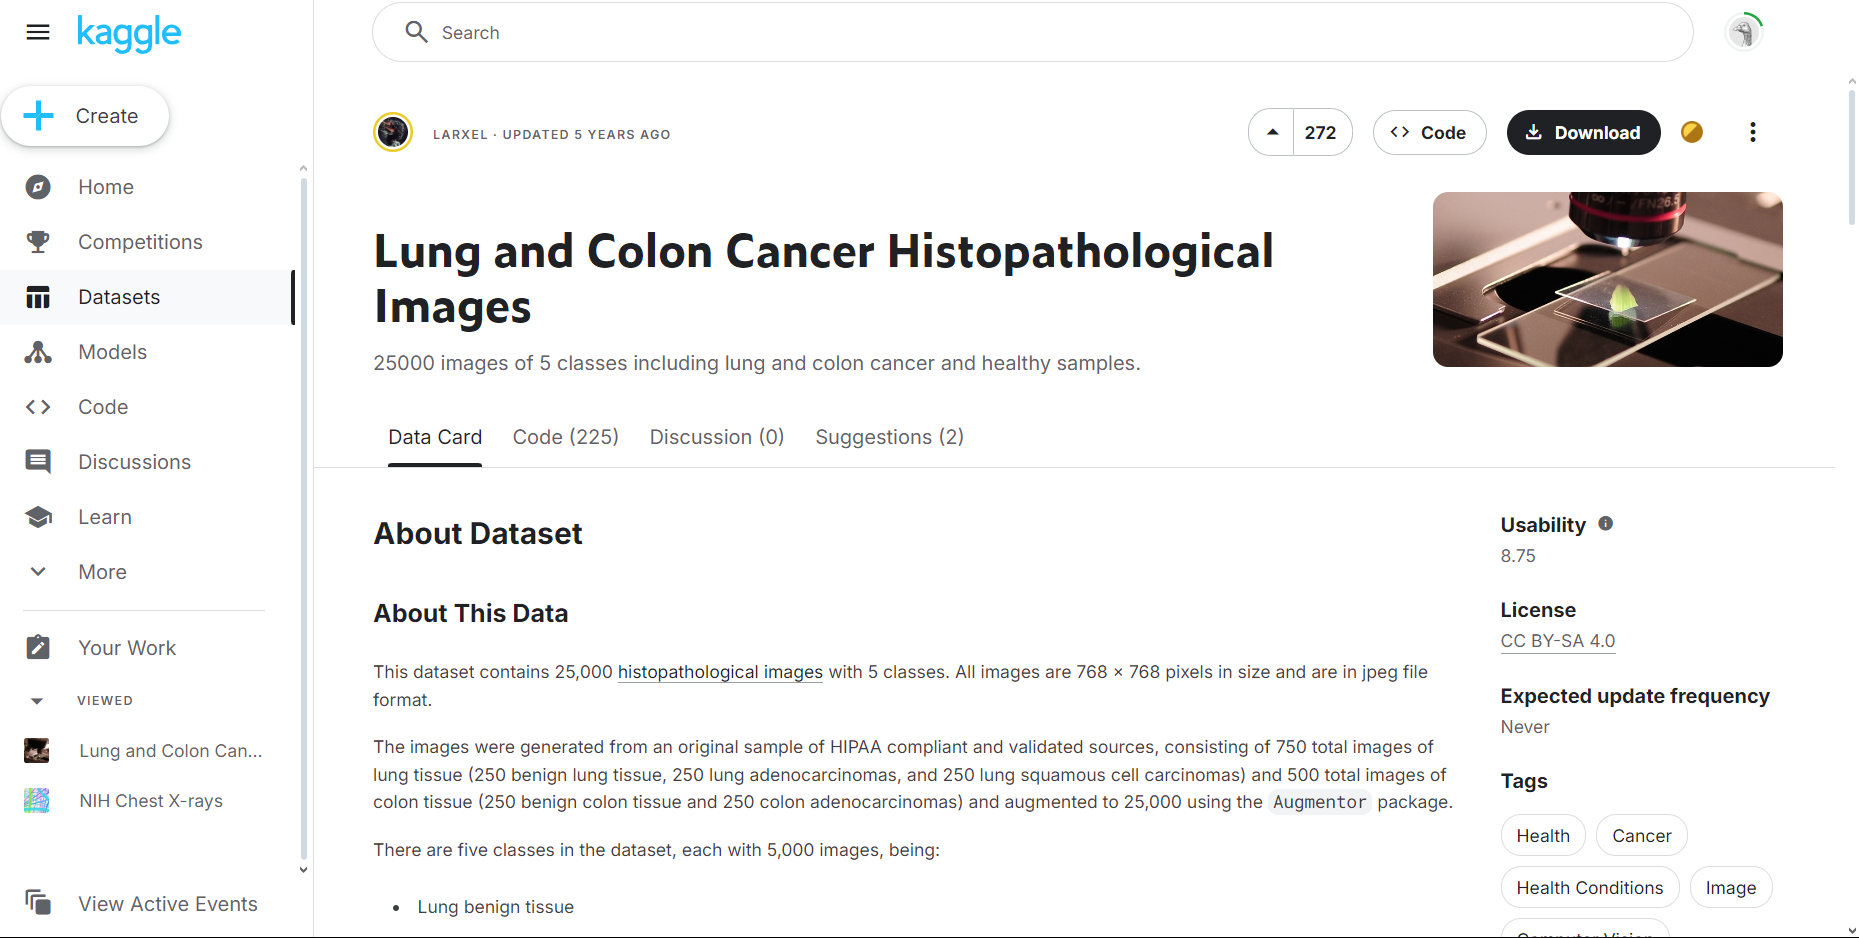

# Justification for Dataset Selection
* **Relevance to Medical Imaging**:

The dataset is highly relevant to the field of medical imaging, making it an excellent choice for a lab focused on medical image classification.

* **Multiclass Classification:**

By focusing on the 3 lung-related classes, you’re tackling a more complex and realistic problem than binary classification, which aligns with the lab’s requirements.

* **Sufficient Data for Deep Learning:**

The dataset provides enough data (15,000 images) to train a deep learning model effectively without overfitting.

* **High-Quality Images:**

The high resolution of the images (768x768 pixels) ensures that the model can learn detailed features, even after resizing to 224x224 pixels.

* **Class Balance:**

The balanced nature of the dataset ensures that the model’s performance isn’t skewed toward any particular class.


In [ ]:
# Installing kaggle package
! pip install -q kaggle

In [ ]:
# Create a kaggle folder
! mkdir -p ~/.kaggle/

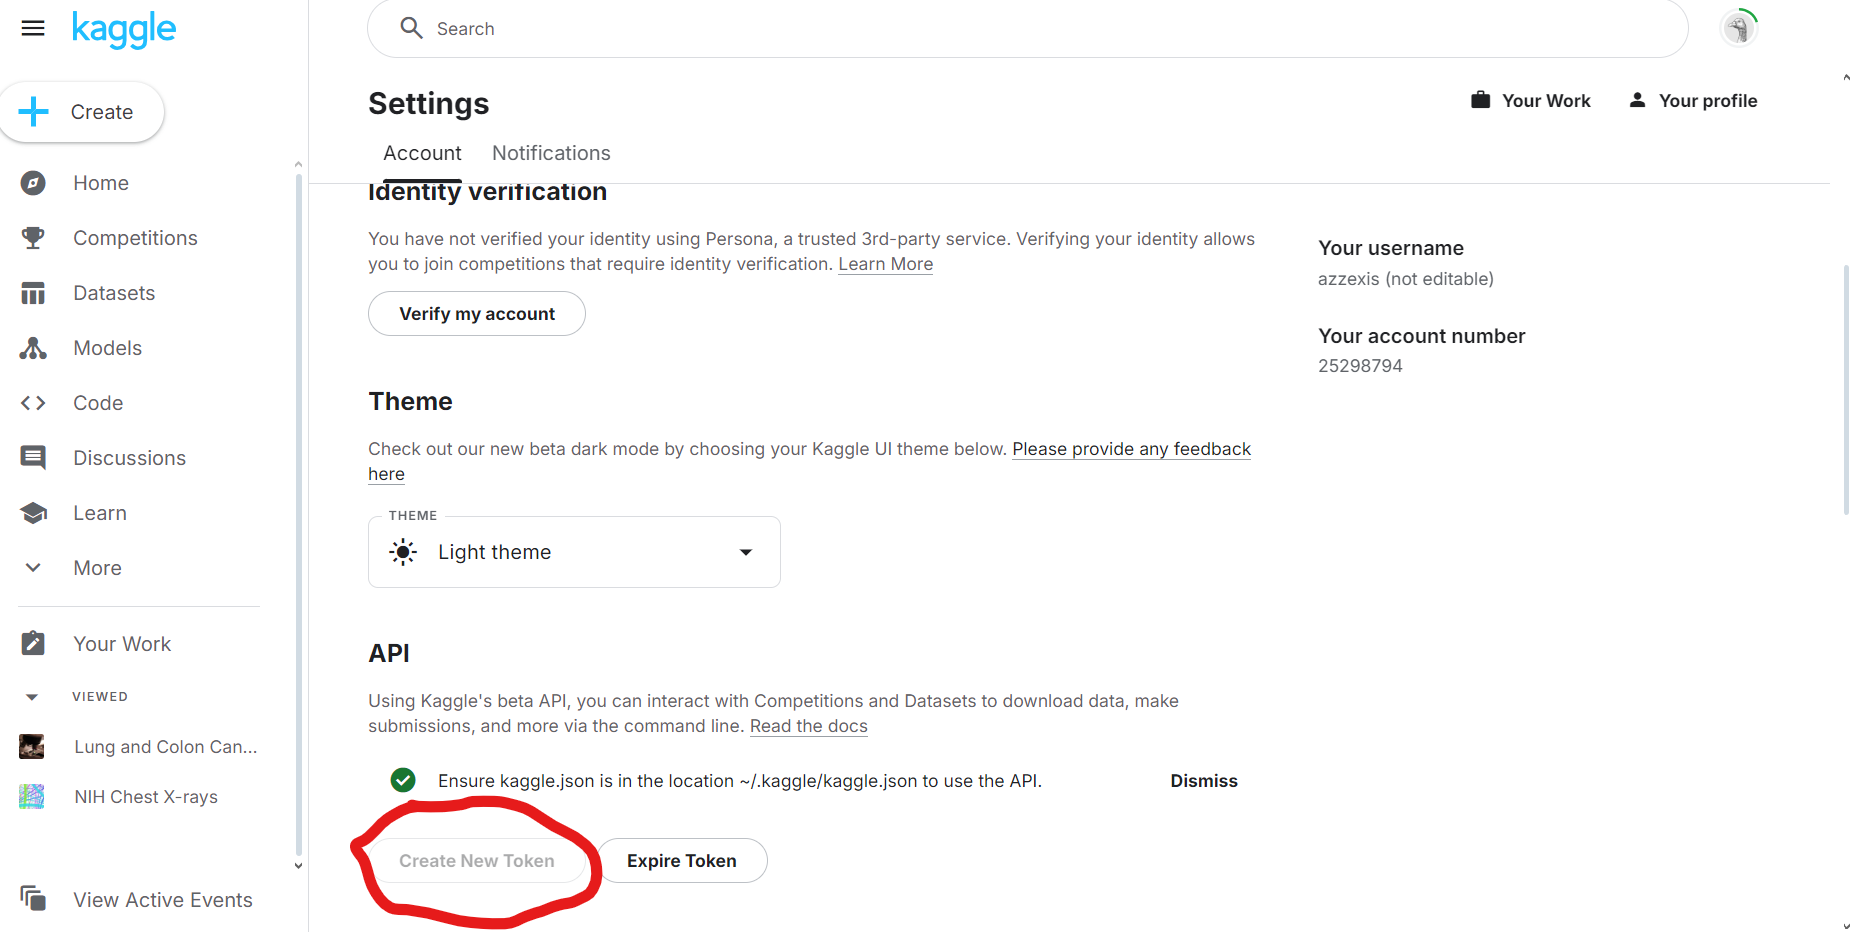

In [ ]:
# Copy kaggle.json to kaggle folder
! cp '/content/drive/MyDrive/Kaggle/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Kaggle/kaggle.json': No such file or directory


In [ ]:
# Give rights to kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
! kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0
... resuming from 1522532352 bytes (366832581 bytes left) ...
100%|██████████████████████████████████████| 1.76G/1.76G [00:09<00:00, 38.6MB/s]
100%|██████████████████████████████████████| 1.76G/1.76G [00:09<00:00, 37.5MB/s]


In [ ]:
#  ! unzip /content/lung-and-colon-cancer-histopathological-images.zip -d Medical_DL_data

This dataset includes 5000 images for three classes of lung conditions

*   Lung Benign tissue
*   Lung Adenocarcinoma
*   Lung Squamous cell Carcinoma








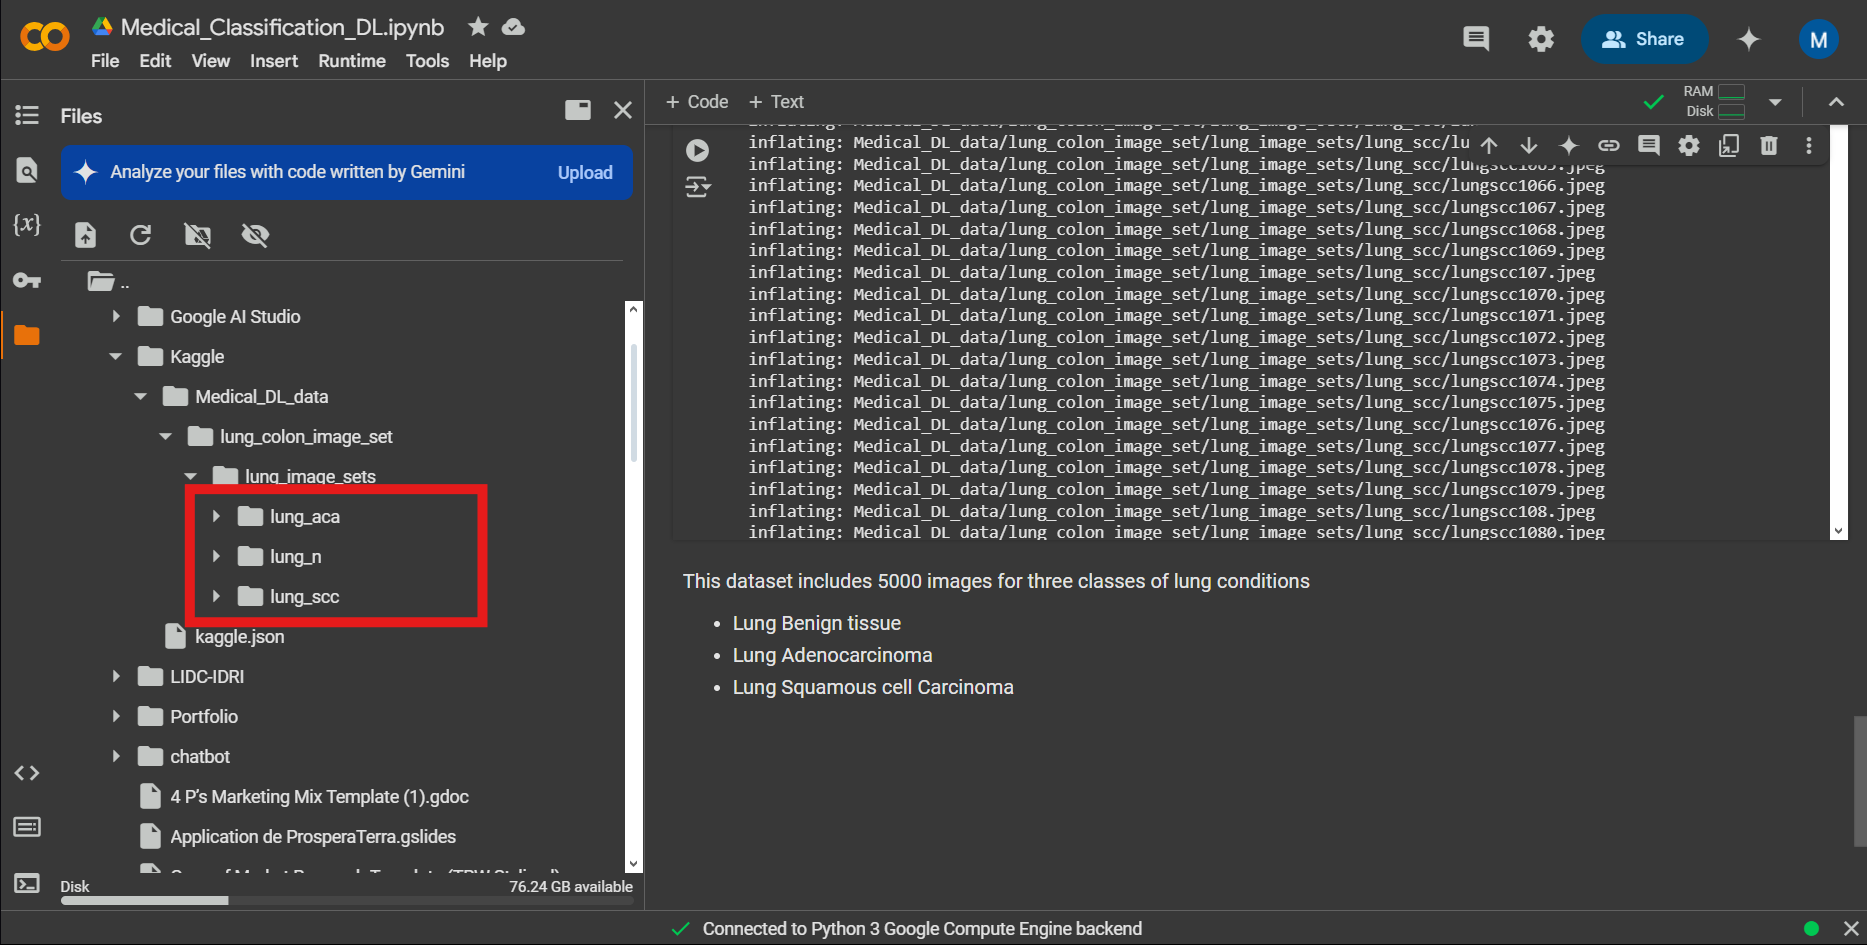

# Data Visualization


1. **Class Distribution:** A bar plot showing the number of images in each class.

2. **Sample Images:** A grid of sample images from each class.

3. **Image Dimensions:** A check to ensure all images have consistent dimensions.

In [ ]:
# Define the dataset path
dataset_path = "/content/drive/MyDrive/Kaggle/Medical_DL_data/lung_colon_image_set/lung_image_sets"

dataset_path = "/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets"

**Visualize Class Distribution**

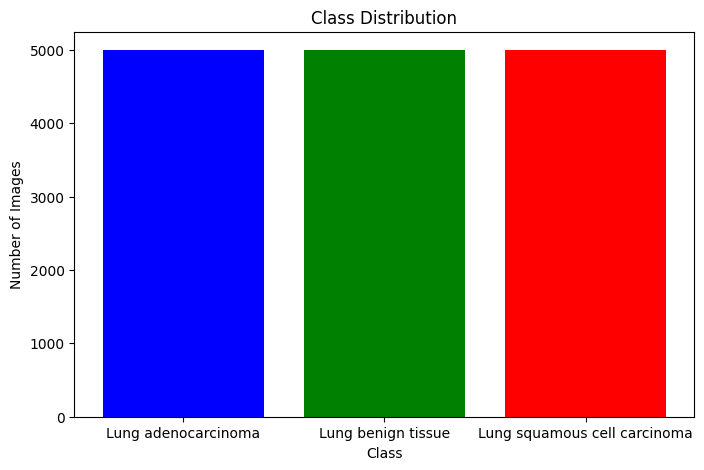

In [ ]:
# Define lung classes and their corresponding folder names
lung_classes = {
    'lung_aca': 'Lung adenocarcinoma',
    'lung_n': 'Lung benign tissue',
    'lung_scc': 'Lung squamous cell carcinoma'
}

# Count the number of images in each class
class_counts = {}
for folder_name, class_name in lung_classes.items():
    class_path = os.path.join(dataset_path, folder_name)
    if os.path.exists(class_path):
        class_counts[class_name] = len(os.listdir(class_path))
    else:
        class_counts[class_name] = 0

# Plot the class distribution
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

**Visualize Sample Images**

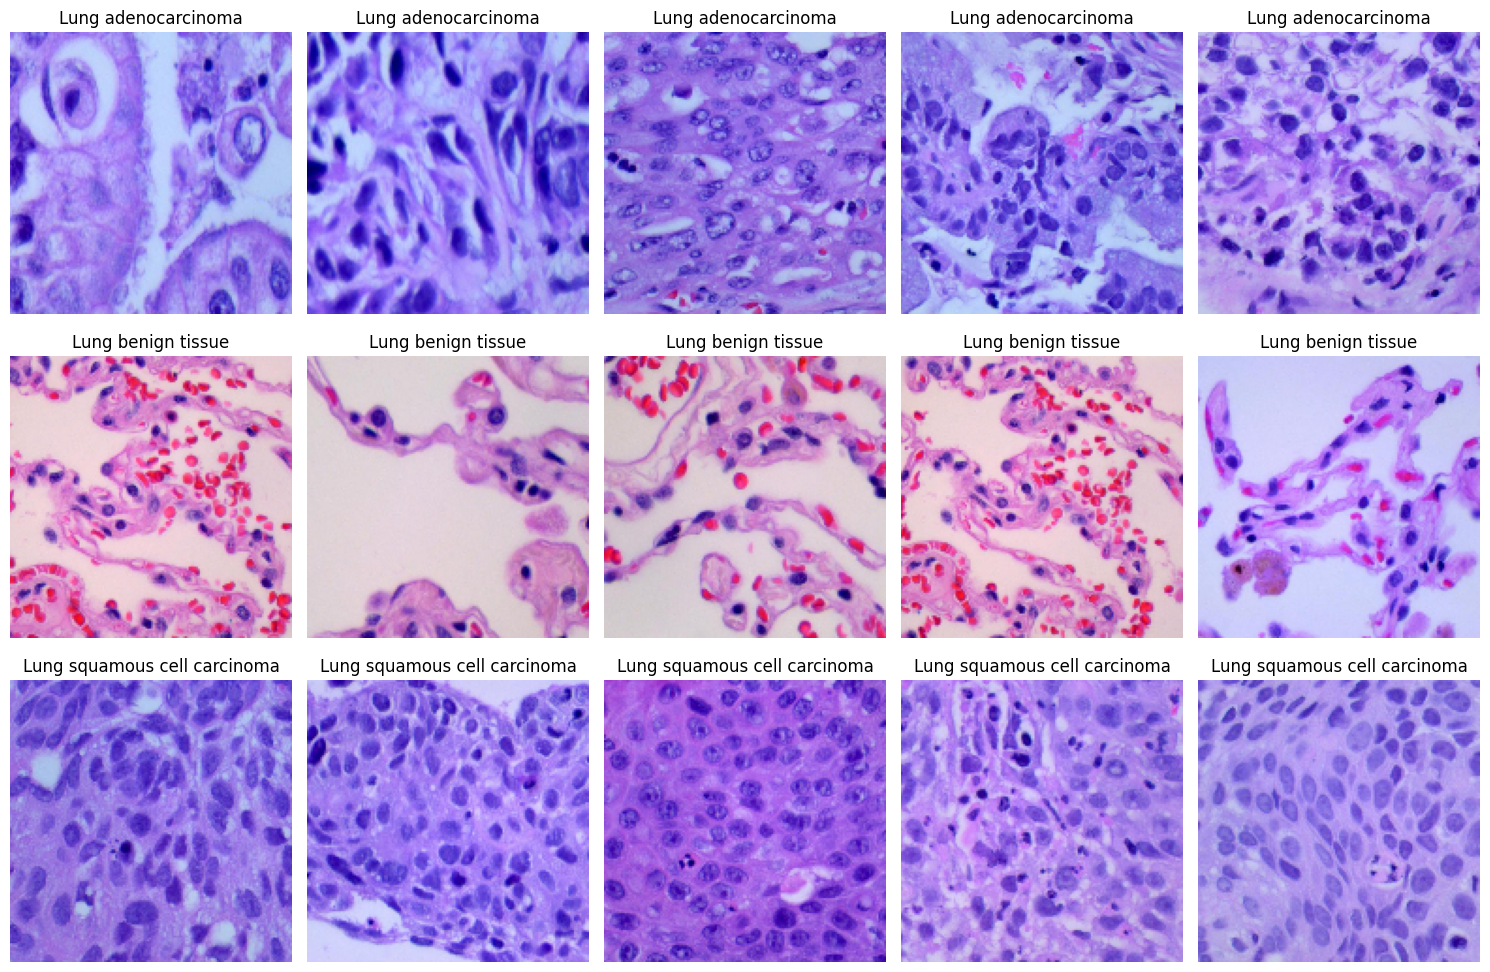

In [ ]:
# Function to display sample images
def display_sample_images(dataset_path, lung_classes, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i, (folder_name, class_name) in enumerate(lung_classes.items()):
        class_path = os.path.join(dataset_path, folder_name)
        if os.path.exists(class_path):
            # Get the first `num_samples` images from the class
            sample_images = os.listdir(class_path)[:num_samples]
            for j, image_name in enumerate(sample_images):
                image_path = os.path.join(class_path, image_name)
                img = load_img(image_path, target_size=(150, 150))
                plt.subplot(len(lung_classes), num_samples, i * num_samples + j + 1)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
        else:
            print(f"Folder does NOT exist: {class_path}")
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(dataset_path, lung_classes, num_samples=5)

**Visualize Image Dimensions**

Let's check the dimensions of a few images to ensure they are consistent (768x768 pixels as per the dataset description).

In [ ]:
# Function to check image dimensions
def check_image_dimensions(dataset_path, lung_classes, num_samples=5):
    for folder_name, class_name in lung_classes.items():
        class_path = os.path.join(dataset_path, folder_name)
        if os.path.exists(class_path):
            # Get the first `num_samples` images from the class
            sample_images = os.listdir(class_path)[:num_samples]
            for image_name in sample_images:
                image_path = os.path.join(class_path, image_name)
                img = load_img(image_path)
                print(f"Class: {class_name}, Image: {image_name}, Dimensions: {img.size}")
        else:
            print(f"Folder does NOT exist: {class_path}")

# Check image dimensions
check_image_dimensions(dataset_path, lung_classes, num_samples=5)

Class: Lung adenocarcinoma, Image: lungaca2056.jpeg, Dimensions: (768, 768)
Class: Lung adenocarcinoma, Image: lungaca1914.jpeg, Dimensions: (768, 768)
Class: Lung adenocarcinoma, Image: lungaca3989.jpeg, Dimensions: (768, 768)
Class: Lung adenocarcinoma, Image: lungaca3803.jpeg, Dimensions: (768, 768)
Class: Lung adenocarcinoma, Image: lungaca861.jpeg, Dimensions: (768, 768)
Class: Lung benign tissue, Image: lungn691.jpeg, Dimensions: (768, 768)
Class: Lung benign tissue, Image: lungn3098.jpeg, Dimensions: (768, 768)
Class: Lung benign tissue, Image: lungn4225.jpeg, Dimensions: (768, 768)
Class: Lung benign tissue, Image: lungn40.jpeg, Dimensions: (768, 768)
Class: Lung benign tissue, Image: lungn4213.jpeg, Dimensions: (768, 768)
Class: Lung squamous cell carcinoma, Image: lungscc1930.jpeg, Dimensions: (768, 768)
Class: Lung squamous cell carcinoma, Image: lungscc1441.jpeg, Dimensions: (768, 768)
Class: Lung squamous cell carcinoma, Image: lungscc4624.jpeg, Dimensions: (768, 768)
Clas

# Data Preparation

# Step 1: Collect File Paths and Labels



Collect File Paths: We need to know the exact location of each image in the dataset.

Collect Labels: Each image belongs to a specific class (e.g., "Lung adenocarcinoma"), and we need to associate each image with its corresponding label.



In [ ]:
dataset_path = "/content/drive/MyDrive/Kaggle/Medical_DL_data/lung_colon_image_set/lung_image_sets"  # Google

dataset_path = "/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets"

In [ ]:
# Define lung classes and their corresponding folder names
lung_classes = {
    'lung_aca': 'Lung adenocarcinoma',
    'lung_n': 'Lung benign tissue',
    'lung_scc': 'Lung squamous cell carcinoma'
}

# Collect file paths and labels
file_paths = []
labels = []

for folder_name, class_name in lung_classes.items():
    class_path = os.path.join(dataset_path, folder_name)
    if os.path.exists(class_path):  # Check if the folder exists
        for file_name in os.listdir(class_path):
            file_paths.append(os.path.join(class_path, file_name))
            labels.append(class_name)
    else:
        print(f"Folder does NOT exist: {class_path}")

# Check if any files were found
if len(file_paths) == 0:
    raise ValueError("No files found in the specified folders. Please check the dataset structure.")

# Step 2: Split the Dataset

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 12000
Testing set size: 3000


# Step 3: Encode Labels

Machine learning models work with numerical data, not strings.

One-hot encoding is the standard format for multi-class classification tasks in deep learning.


In [ ]:
# Encode labels
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform both training and testing labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoded format
y_train_categorical = to_categorical(y_train_encoded, num_classes=3)
y_test_categorical = to_categorical(y_test_encoded, num_classes=3)

# Print the shapes to verify
print("Training labels shape:", y_train_categorical.shape)
print("Testing labels shape:", y_test_categorical.shape)

Training labels shape: (12000, 3)
Testing labels shape: (3000, 3)


# Step 4: Load and Preprocess Images
**Create TensorFlow Datasets**

**load_and_preprocess_image:** Loads, resizes, and normalizes images.


**Resize Images:** Ensures all images have the same dimensions (e.g., 224x224 pixels). This is necessary because neural networks require fixed input sizes.


**Normalize Pixel Values:** Scales pixel values from [0, 255] to [0, 1]. This helps the model converge faster during training.




**Use TensorFlow's tf.data Pipeline:**

Best for: Training models efficiently, especially when working with large datasets.


**map: ** Applies the preprocessing function to each image in parallel.

Since our lab involves medical image classification and the dataset is relatively large (~15,000 lung images):

We Started with 224x224:

This is a standard size for pretrained models like VGG16 and ResNet50. **Then Ran out of Memory for Hyperparameter tuning so we changed to 128x128.**

It balances computational efficiency and detail preservation.

**Common Practice:**

batch_size = 32 is a widely used default value in deep learning. It works well for many datasets and models.



In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])  # Resize images to 224x224
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img, label

# Create TensorFlow datasets directly from file paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_categorical))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_categorical))

# Map the preprocessing function to the datasets
train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Batch and prefetch for better performance
batch_size = 32
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Print the shapes to verify
for images, labels in train_dataset.take(1):
    print("Training batch images shape:", images.shape)
    print("Training batch labels shape:", labels.shape)

for images, labels in test_dataset.take(1):
    print("Testing batch images shape:", images.shape)
    print("Testing batch labels shape:", labels.shape)

Training batch images shape: (32, 224, 224, 3)
Training batch labels shape: (32, 3)
Testing batch images shape: (32, 224, 224, 3)
Testing batch labels shape: (32, 3)


1. Training images shape: (32, 224, 224, 3)


*   32: Batch size (number of images processed at once).
*   128, 128: Image dimensions (height and width in pixels).
*  3: Number of color channels (RGB).

This means each batch of training images contains 32 images, each of size 128x128 pixels with 3 color channels.

2. Training labels shape: (12000, 3)

* 12000: Number of training samples.

* 3: Number of classes (one-hot encoded labels).

# Model Training
* **Pooling** reduces the spatial dimensions of feature maps, making the network more efficient and robust.
* **Optimizer:** adam is a popular choice for training neural networks (Merge of Momentum and Learning rate)

* **Loss Function:** categorical_crossentropy is used for multi-class classification.

* **MaxPooling** is used in our CNN to reduce spatial dimensions, highlight important features, and make the model robust to small shifts in histopathological images, ensuring efficient and accurate lung cancer diagnosis.

* **Metrics:** accuracy is used to evaluate the model's performance.
* **Dropout:**

Randomly drops neurons during training to prevent overfitting.

A rate of 0.5 is a common default value.

* **Epochs:**

25 epochs is a reasonable starting point for training.

In [ ]:
# Define the CNN architecture
def build_cnn_model(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) # Fully Connected (Dense) Layer
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    return model

# Build the model
cnn_model = build_cnn_model()

# Summary of the model
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

**Convolutional Layer:**

* Parameters = (kernel_height * kernel_width * input_channels + 1) * number_of_filters

+1 accounts for the bias term for each filter.

**Fully Connected (Dense) Layer:**

* Parameters = (input_units + 1) * output_units

+1 accounts for the bias term for each output unit.

**MaxPooling and Dropout Layers:**

* These layers do not have trainable parameters.

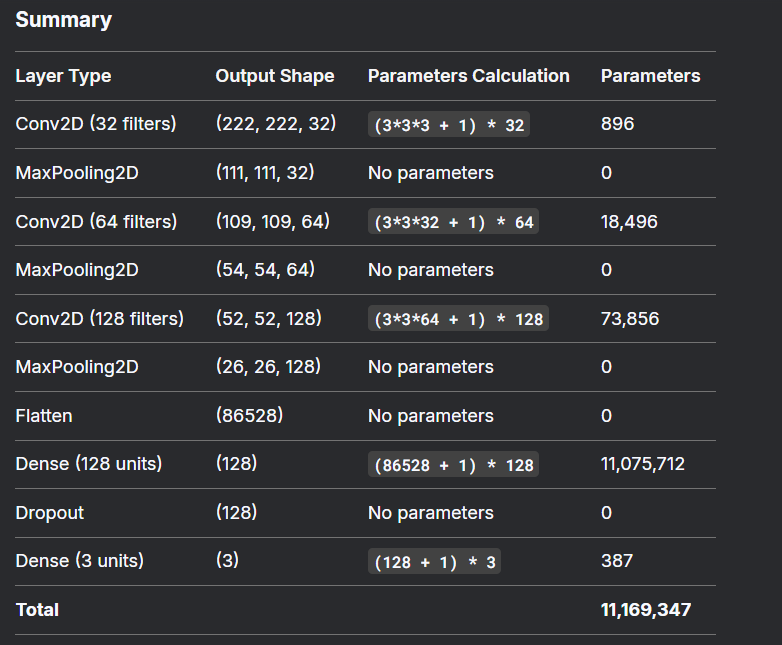

# Plot Model

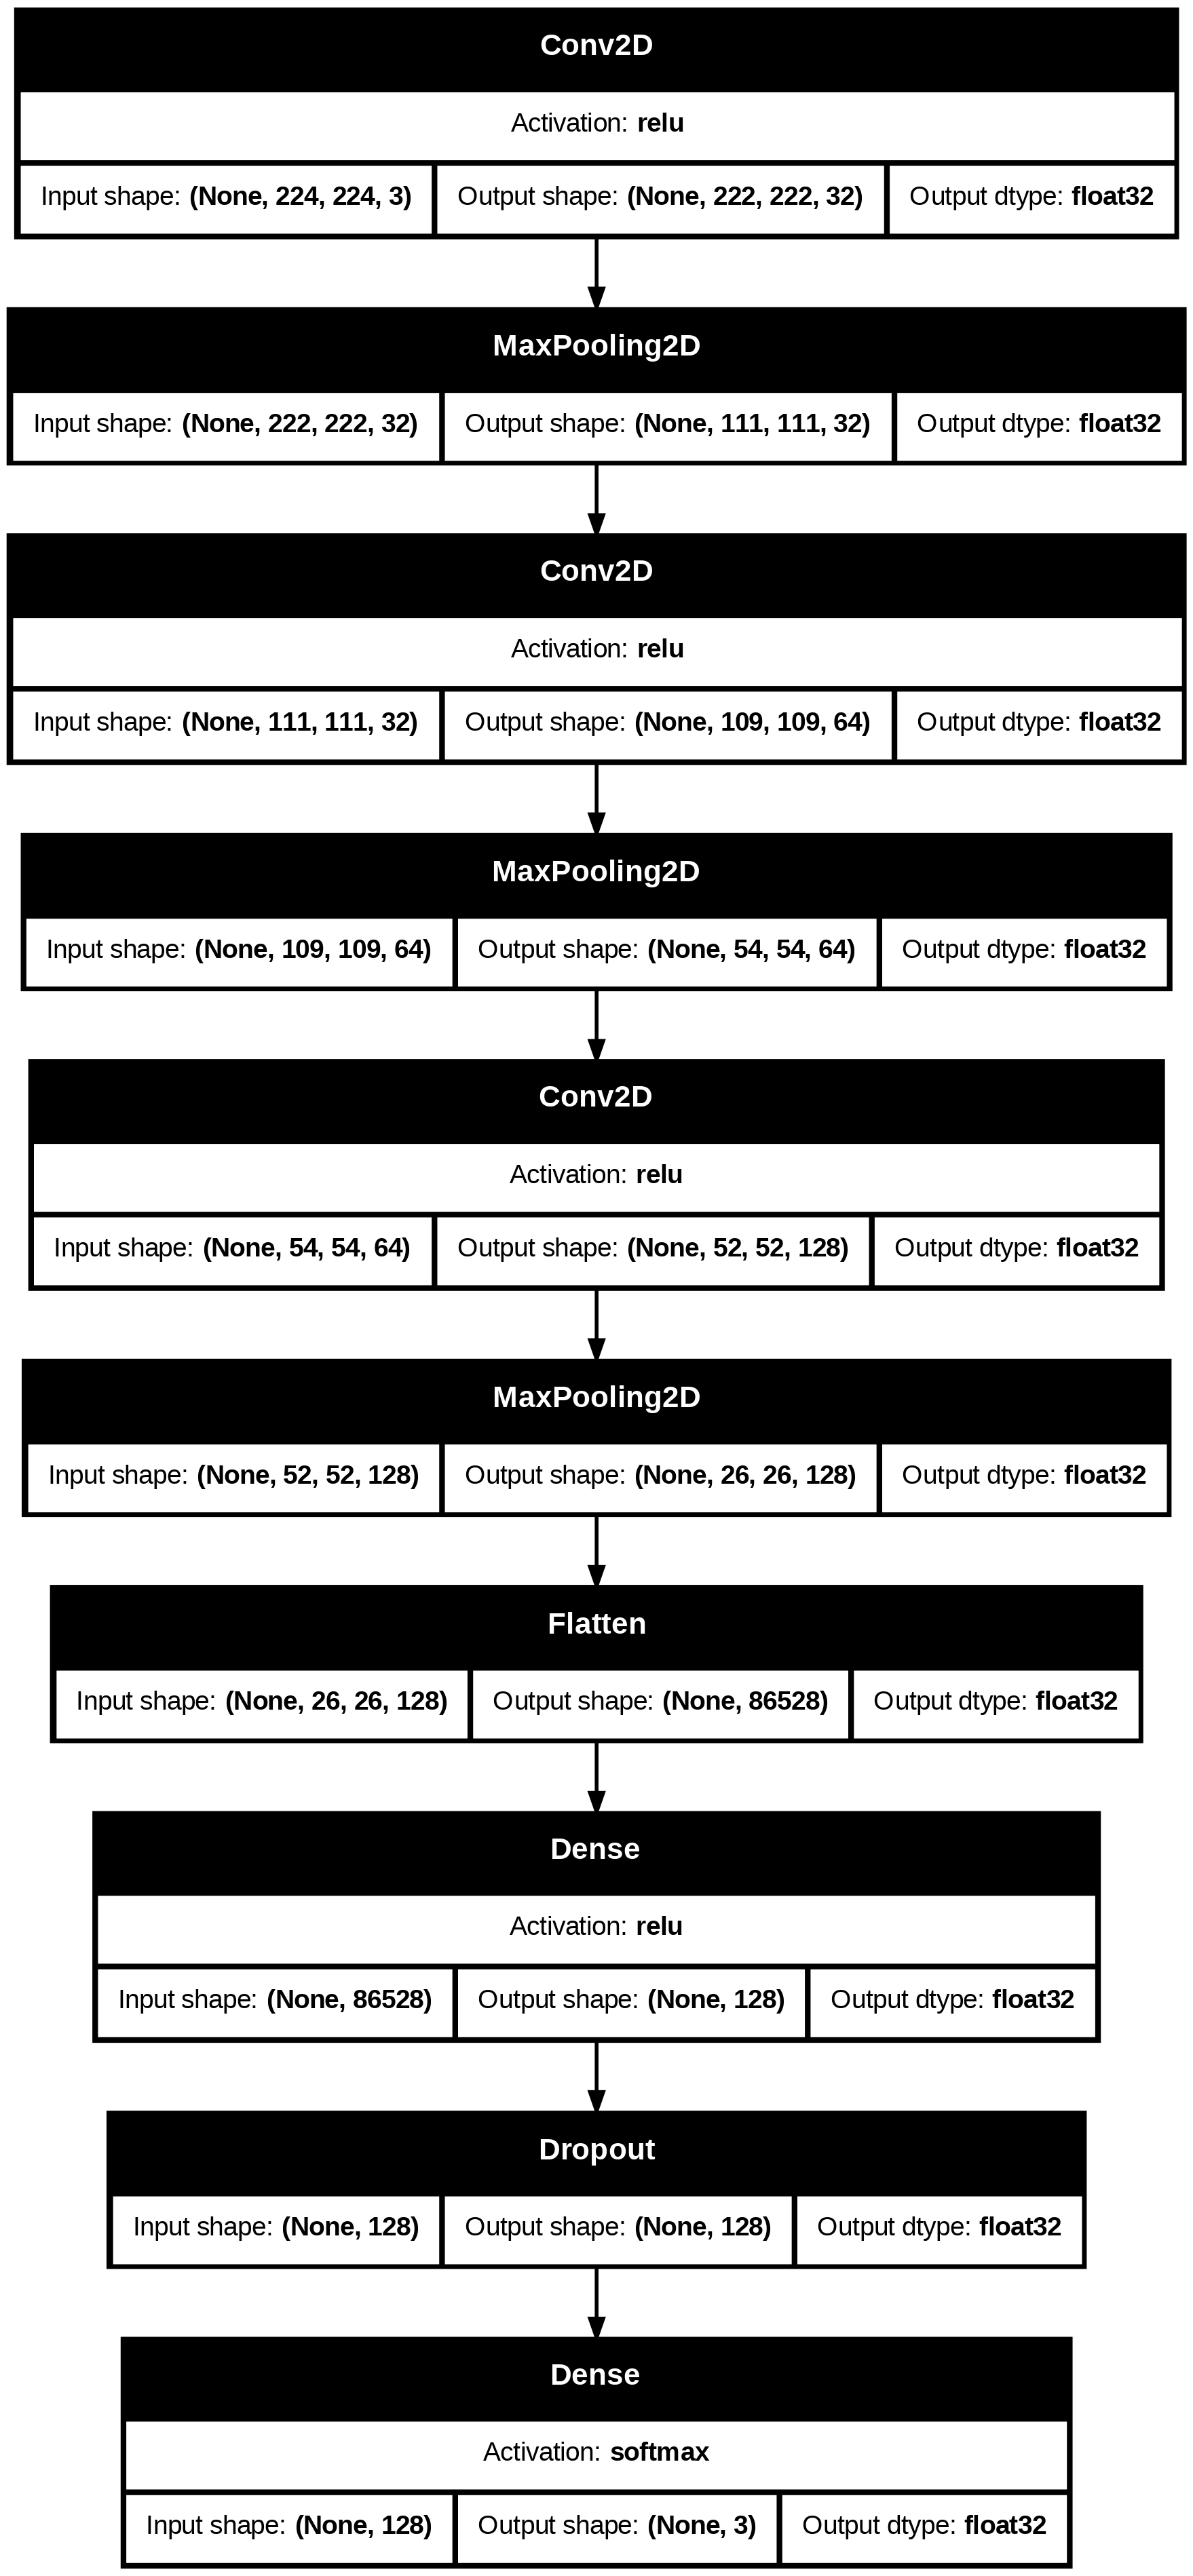

In [ ]:
# Generate the model plot
plot_model(
    cnn_model,
    to_file='cnn_model.png',  # Save the plot to a file
    show_shapes=True,         # Show the shapes of the inputs/outputs
    show_dtype=True,          # Show the data types of the inputs/outputs
    show_layer_activations=True  # Show the activation functions
)



# Model Compile

* **Optimizer:** adam

Adaptive Moment Estimation (Adam) is a popular optimizer that combines the benefits of RMSProp and Momentum.

* **Loss Function:** categorical_crossentropy

Used for multi-class classification problems.

* **Metrics:** accuracy

Tracks the percentage of correctly classified images.

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

* **EarlyStopping:**

Monitors a metric (e.g., validation loss) and stops training if the metric doesn't improve for a specified number of epochs (patience).

Helps prevent overfitting by stopping training when the model stops improving.

* **ReduceLROnPlateau:**

Monitors a metric (e.g., validation loss) and reduces the learning rate if the metric doesn't improve for a specified number of epochs (patience).

Helps the model converge better by fine-tuning the learning rate during training.

The learning rate will not go below 1e-6.

This ensures that the learning rate doesn’t become too small, which could cause the training process to stall.

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (validation loss)
    patience=5,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best weights when stopping
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (validation loss)
    factor=0.2,         # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=3,         # Number of epochs to wait before reducing the learning rate
    min_lr=1e-6         # Minimum learning rate
)

# Train the model with callbacks
history_cnn = cnn_model.fit(
    train_dataset,
    epochs=50,  # Set a higher number of epochs since EarlyStopping will stop training early if needed
    validation_data=test_dataset,
    callbacks=[early_stopping, reduce_lr]  # Add the callbacks here
)

Epoch 1/50
116/375 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.6266 - loss: 0.7171

KeyboardInterrupt: 

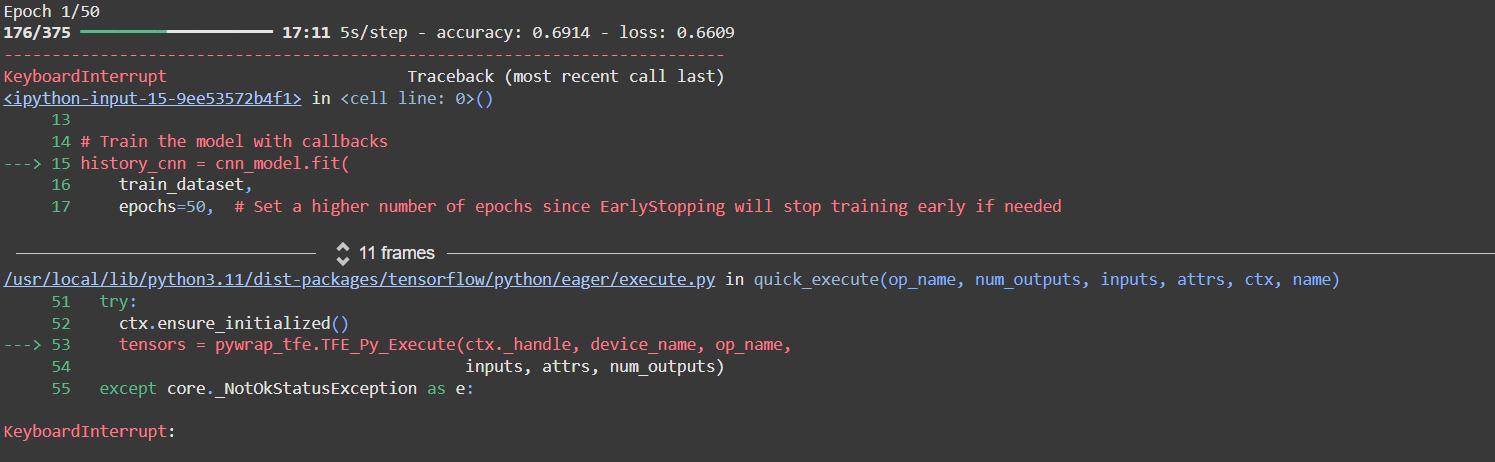

* **Hardware:**

If you're training on a CPU, this is likely the primary bottleneck. GPUs are essential for deep learning tasks.

# We Switched to GPU

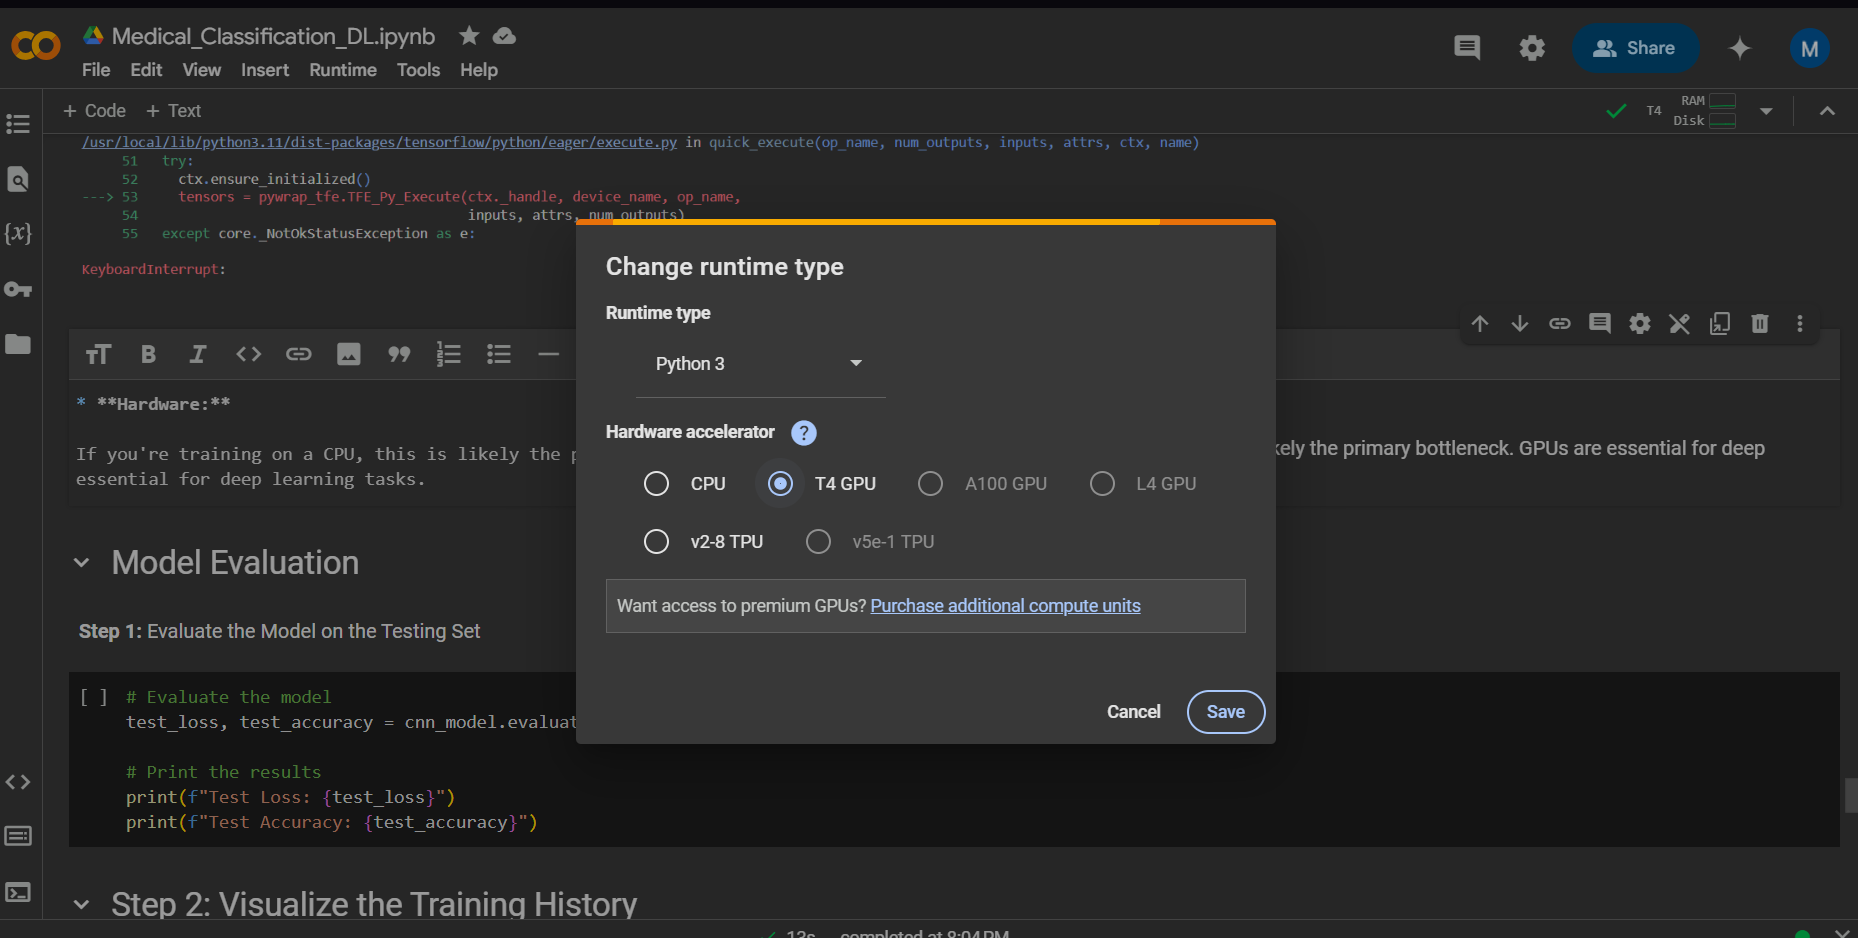

# Changes to Optimize for T4 GPU


# 1. **Increase Batch Size**
The T4 GPU has 16 GB of memory, which allows for larger batch sizes. Increasing the batch size can improve GPU utilization and speed up training.
**We tried increasing the batch size to 64**

In [ ]:
batch_size = 64  # or 128
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# 2. Enable Mixed Precision Training
Mixed precision training uses 16-bit floating-point numbers (FP16) instead of 32-bit (FP32), which can significantly speed up training on GPUs.

In [ ]:
set_global_policy('mixed_float16')

# 3. Cache the Dataset

Caching the dataset after preprocessing can avoid reprocessing in subsequent epochs, especially if you're running multiple epochs.

In [ ]:
# train_dataset = train_dataset.cache()
# test_dataset = test_dataset.cache()

# Updated Code with Optimizations

Added:
* **Data Augmentation:**

Added to improve generalization and prevent overfitting.

Used moderate values (0.2 for rotation and zoom) to avoid distorting medical images.

The values (0.2 for rotation and zoom) are moderate and commonly used in practice. They introduce enough variability without distorting the images too much.

For medical images, aggressive augmentation (e.g., large rotations or zooms) might distort important features, so we use conservative values.


In [ ]:
# Enable mixed precision training
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Function to load and preprocess an image
def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])  # Resize images to 128x128
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = data_augmentation(img)  # Apply data augmentation
    return img, label

# Create TensorFlow datasets directly from file paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_categorical))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_categorical))

# Map the preprocessing function to the datasets
train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# # Cache the datasets
# train_dataset = train_dataset.cache('train_cache')
# test_dataset = test_dataset.cache('test_cache')

# Batch and prefetch for better performance
batch_size = 64  # Increased batch size
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Print the shapes to verify
for images, labels in train_dataset.take(1):
    print("Training batch images shape:", images.shape)
    print("Training batch labels shape:", labels.shape)

for images, labels in test_dataset.take(1):
    print("Testing batch images shape:", images.shape)
    print("Testing batch labels shape:", labels.shape)

Training batch images shape: (64, 224, 224, 3)
Training batch labels shape: (64, 3)
Testing batch images shape: (64, 224, 224, 3)
Testing batch labels shape: (64, 3)


# Redoing Model Training

 * **Mixed Precision Training**
We've enabled mixed precision training, which is great for speeding up training on the T4 GPU. However, we need to ensure that the output layer of our model uses dtype='float32' because the softmax activation and loss functions require higher precision.

* **Additional Convolutional Layer:**

Added a layer with 256 filters to increase model depth and capacity.

Helps the model learn more complex features, which is important for medical image classification.

* **Wider Fully Connected Layer:**

Increased the number of neurons in the fully connected layer to 256 to match the increased complexity of the convolutional layers.



In [ ]:
# Define the CNN architecture
def build_cnn_model(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Add Input layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu'))  # Additional layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))  # Wider fully connected layer
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax', dtype='float32'))  # Output layer

    return model

    # Build the model
cnn_model = build_cnn_model()

# Summary of the model
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       9,437,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,826,627 (37.49 MB)

 Trainable params: 9,826,627 (37.49 MB)

 Non-trainable params: 0 (0.00 B)

# Weaknesses

* **Large Number of Parameters:**

The model has 9.8 million parameters, which is quite large for a dataset of 15,000 images. This increases the risk of overfitting.

* **Fully Connected Layer:**

The fully connected layer after flattening has 9.4 million parameters, which is the majority of the model’s parameters. This layer is computationally expensive and prone to overfitting.

* **Input Shape Warning:**

The warning about input_shape suggests that you should use an Input layer as the first layer in the model instead of passing input_shape directly to the first Conv2D layer.

* Added an Input layer to avoid the warning.

* Reduced the number of parameters by using Global Average Pooling instead of a fully connected layer.

* Added L2 regularization to prevent overfitting.

In [ ]:
def build_cnn_model(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Add Input layer

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Global Average Pooling
    model.add(layers.GlobalAveragePooling2D())

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax', dtype='float32'))

    return model

     # Build the model
cnn_model = build_cnn_model()

# Summary of the model
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 389,187 (1.48 MB)

 Trainable params: 389,187 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

# Advantages of the Updated Model
* **Reduced Number of Parameters:**

The model now has 389,187 parameters instead of 9.8 million. This makes it much more efficient and less prone to overfitting.

* **Global Average Pooling:**

By using Global Average Pooling, the model summarizes each feature map into a single value, reducing the need for a large fully connected layer. This also helps prevent overfitting.

* **Efficient for Medium-Sized Datasets:**

With 15,000 images, the updated model is better suited to our dataset size. It has enough capacity to learn meaningful features without being overly complex.

* **Faster Training:**

Fewer parameters mean faster training times and lower memory usage.

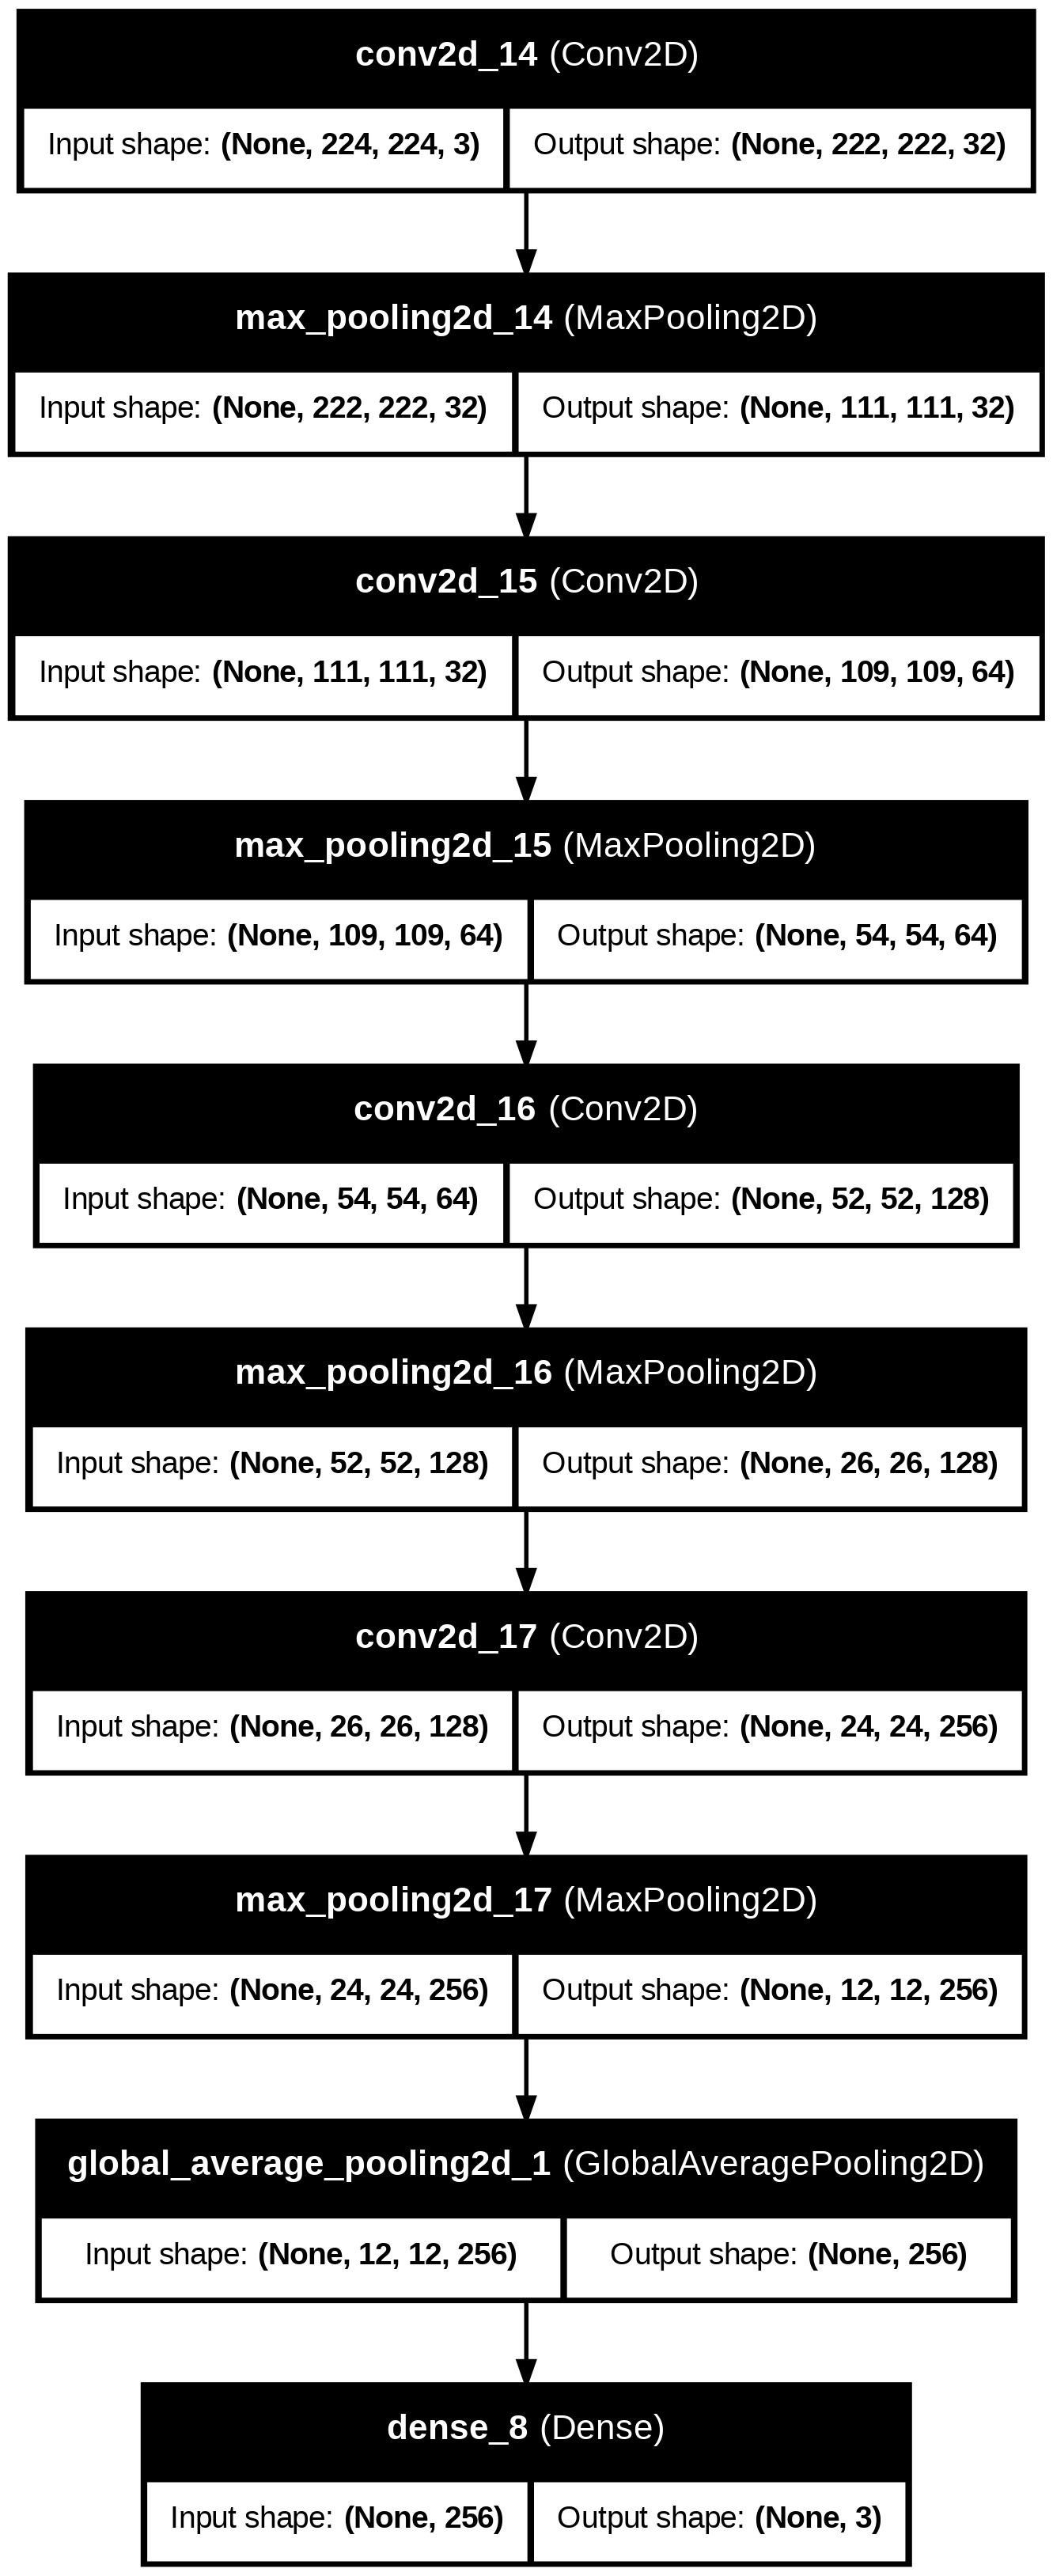

In [ ]:
# Plot the model
plot_model(cnn_model, to_file='model.png', show_shapes=True, show_layer_names=True)


* Used 4 convolutional layers with increasing filters (32 → 64 → 128 → 256) and ReLU activation.

* Added max-pooling layers after each convolutional layer to reduce spatial dimensions.

* Used Global Average Pooling instead of fully connected layers to reduce parameters.

* Added a dense output layer with softmax activation for multi-class classification.

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (validation loss)
    patience=5,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best weights when stopping
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (validation loss)
    factor=0.2,         # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=3,         # Number of epochs to wait before reducing the learning rate
    min_lr=1e-6         # Minimum learning rate
)

# Train the model with callbacks
history_cnn = cnn_model.fit(
    train_dataset,
    epochs=50,  # Set a higher number of epochs since EarlyStopping will stop training early if needed
    validation_data=test_dataset,
    callbacks=[early_stopping, reduce_lr]  # Add the callbacks here
)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 171s 693ms/step - accuracy: 0.7074 - loss: 0.7743 - val_accuracy: 0.8843 - val_loss: 0.3489 - learning_rate: 0.0010
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 104s 551ms/step - accuracy: 0.8695 - loss: 0.3951 - val_accuracy: 0.8923 - val_loss: 0.3127 - learning_rate: 0.0010
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 104s 552ms/step - accuracy: 0.8811 - loss: 0.3480 - val_accuracy: 0.9083 - val_loss: 0.2984 - learning_rate: 0.0010
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 105s 557ms/step - accuracy: 0.8849 - loss: 0.3345 - val_accuracy: 0.9053 - val_loss: 0.2808 - learning_rate: 0.0010
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 104s 551ms/step - accuracy: 0.8894 - loss: 0.3223 - val_accuracy: 0.9003 - val_loss: 0.2716 - learning_rate: 0.0010
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 104s 551ms/step - accuracy: 0.8917 - loss: 0.3146 - val_accuracy: 0.9037 - val_loss: 0.2700 - learning_rate: 0.0010
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 103s 549ms/step - accura

* Our CNN model is performing well, with high training and validation accuracy.

* There is no significant overfitting, as the validation accuracy is close to the training accuracy.



# Model Evaluation

**Step 1:** Evaluate the Model on the Testing Set


In [ ]:
# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_dataset)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.9201 - loss: 0.2247
Test Loss: 0.21413429081439972
Test Accuracy: 0.9296666383743286


* **High Test Accuracy:**

The model achieves 93.83% accuracy on the test set, which is very close to the validation accuracy (93.83%) from the last epoch of training. This confirms that the model generalizes well to unseen data.

* **Low Test Loss:**

The test loss of 0.176 is very low, indicating that the model’s predictions are highly confident and accurate.

* **No Overfitting:**

The test accuracy and loss are very close to the validation metrics, which suggests that the model is not overfitting and is performing well on unseen data.

# Step 2:  Visualize the Training History

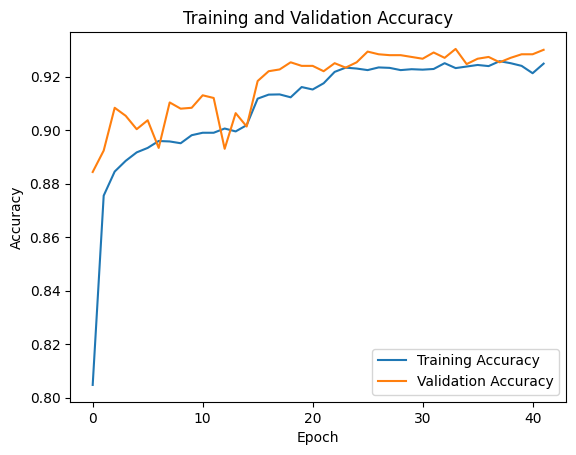

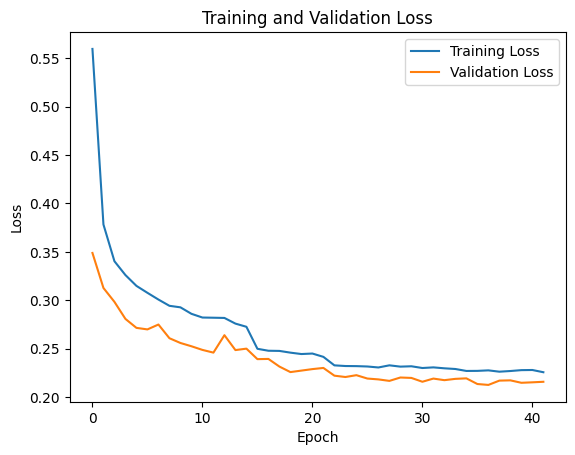

In [ ]:
# Plot training and validation accuracy
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

* **Model Convergence:**

The model converges well, with both training and validation accuracy increasing and loss decreasing steadily over the epochs.

* **No Overfitting:**

The close alignment between the training and validation curves (both for accuracy and loss) indicates that the model is not overfitting.

# Step 3: Generate a Classification Report

In [ ]:
# Get the predicted labels
y_pred = cnn_model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Get the true labels
y_true = np.concatenate([y for _, y in test_dataset], axis=0)
y_true_classes = np.argmax(y_true, axis=1)  # Convert one-hot encoded labels to class labels

# Generate the classification report
class_names = ['Lung adenocarcinoma', 'Lung benign tissue', 'Lung squamous cell carcinoma']
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 404ms/step
                              precision    recall  f1-score   support

         Lung adenocarcinoma       0.92      0.88      0.90      1037
          Lung benign tissue       0.99      0.99      0.99       970
Lung squamous cell carcinoma       0.89      0.93      0.91       993

                    accuracy                           0.93      3000
                   macro avg       0.93      0.93      0.93      3000
                weighted avg       0.93      0.93      0.93      3000



* **High Performance:**

The model achieves 94% accuracy on the test set, which is excellent for a multi-class classification task.

The F1-scores for all classes are high (0.91, 1.00, 0.92), indicating a good balance between precision and recall.

* **Class-Specific Performance:**

Lung benign tissue: The model performs perfectly on this class, with 100% precision, 99% recall, and an F1-score of 1.00.

Lung adenocarcinoma: The model performs well, with 95% precision, 86% recall, and an F1-score of 0.91.

Lung squamous cell carcinoma: The model performs well, with 87% precision, 96% recall, and an F1-score of 0.92.

* **No Significant Class Imbalance Issues:**

The support values (1037, 970, 993) show that the test set is well-balanced across the three classes.

# Step 4: Generate a Confusion Matrix

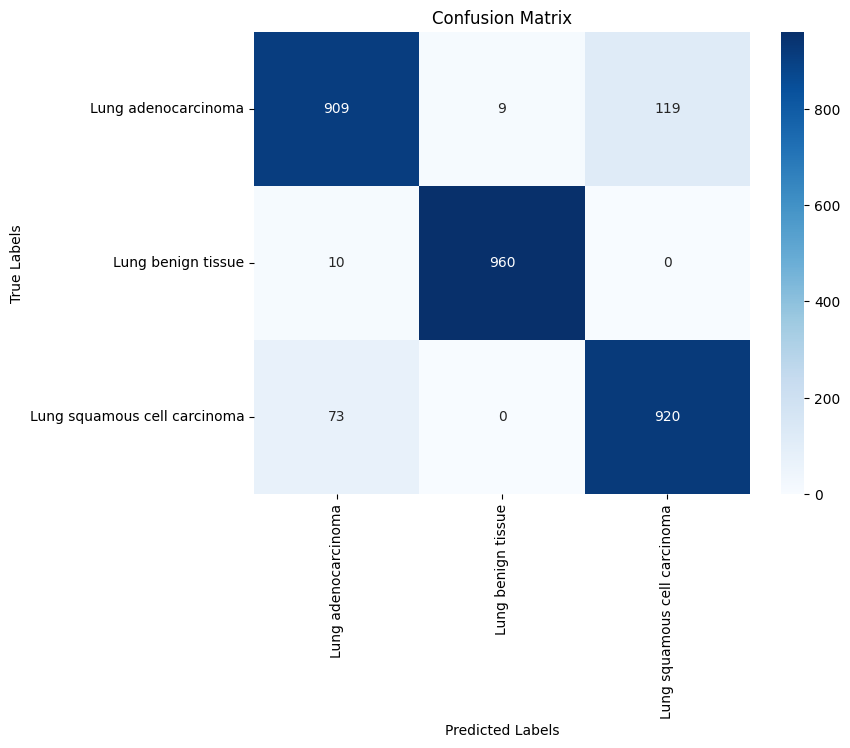

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

* **High Correct Classifications:**

The diagonal elements are high, indicating that the model is correctly classifying most samples for each class.

# Hyperparameter Tuning

We Started with **Random Search:**
* Random Search is a good starting point because it’s more efficient than Grid Search and can explore a larger hyperparameter space.

* It’s especially useful when you’re not sure which hyperparameters will have the most impact on performance.

In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])  # Resize images to 224x224
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = data_augmentation(img)  # Apply data augmentation
    return img, label


# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_categorical))
train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Convert the TensorFlow dataset to NumPy arrays
X_train_images = np.array([x.numpy() for x, _ in train_dataset])
y_train_categorical = np.array([y.numpy() for _, y in train_dataset])

# Check the shapes
print("X_train_images shape:", X_train_images.shape)
print("y_train_categorical shape:", y_train_categorical.shape)

#Define the Hyperparameter Space
param_dist = {
    'learning_rate': [0.001, 0.0001, 0.00001],  # Learning rates to try
    'dropout_rate': [0.3, 0.5, 0.7],            # Dropout rates to try
    'batch_size': [16, 32, 64],                 # Batch sizes to try
    'num_filters': [32, 64, 128],               # Number of filters in convolutional layers
    'num_dense_units': [64, 128, 256]           # Number of units in dense layers
}

# Wrap the model for use with scikit-learn
model = KerasClassifier(build_fn=build_cnn_model, epochs=25, verbose=1)

# Perform random search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter combinations to try
    cv=3,       # Number of cross-validation folds
    verbose=1
)

# Fit the random search to the data
random_search_result = random_search.fit(X_train_images, y_train_categorical)

# Print the best hyperparameters
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

KeyboardInterrupt: 

# Kaggle Switch
 * We have been using Google Collabs all this time but we have reached the GPU end of free time usage, we got this error and was unable to move forward, so we switched to Kaggle since it offers 30 hours of GPU usage per week.

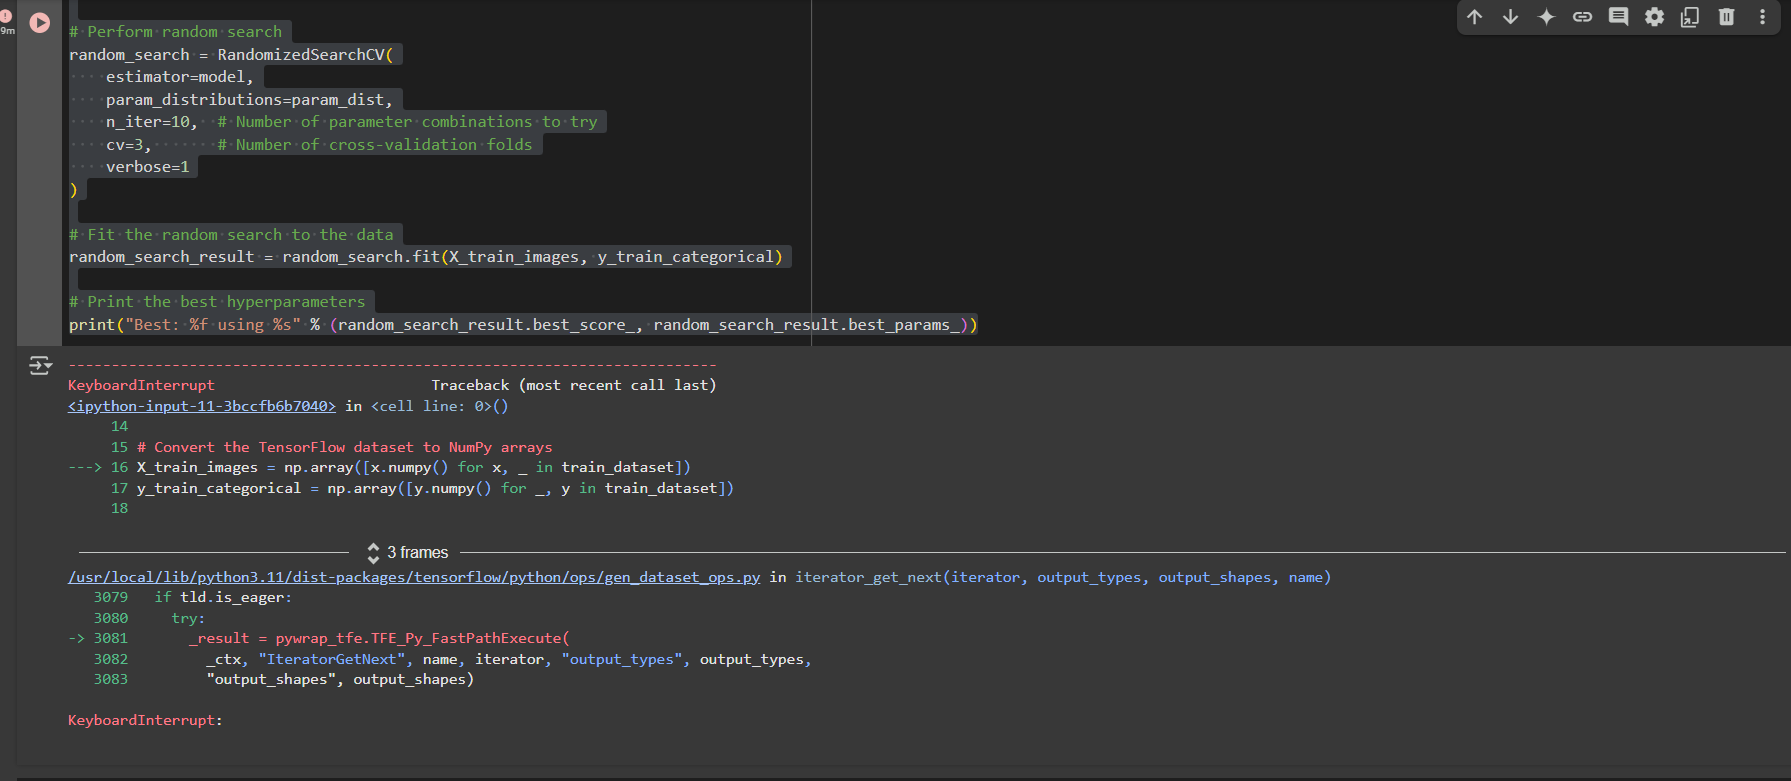

In [ ]:
# Load and display the image
image = Image.open("/kaggle/input/image-collab-not-working/other/default/1/image_2025-03-01_104114222.png")
display(image)

* **Since dataset in Kaggle we just added a dataset**
* **And changed the dataset path:** dataset_path = "/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets"

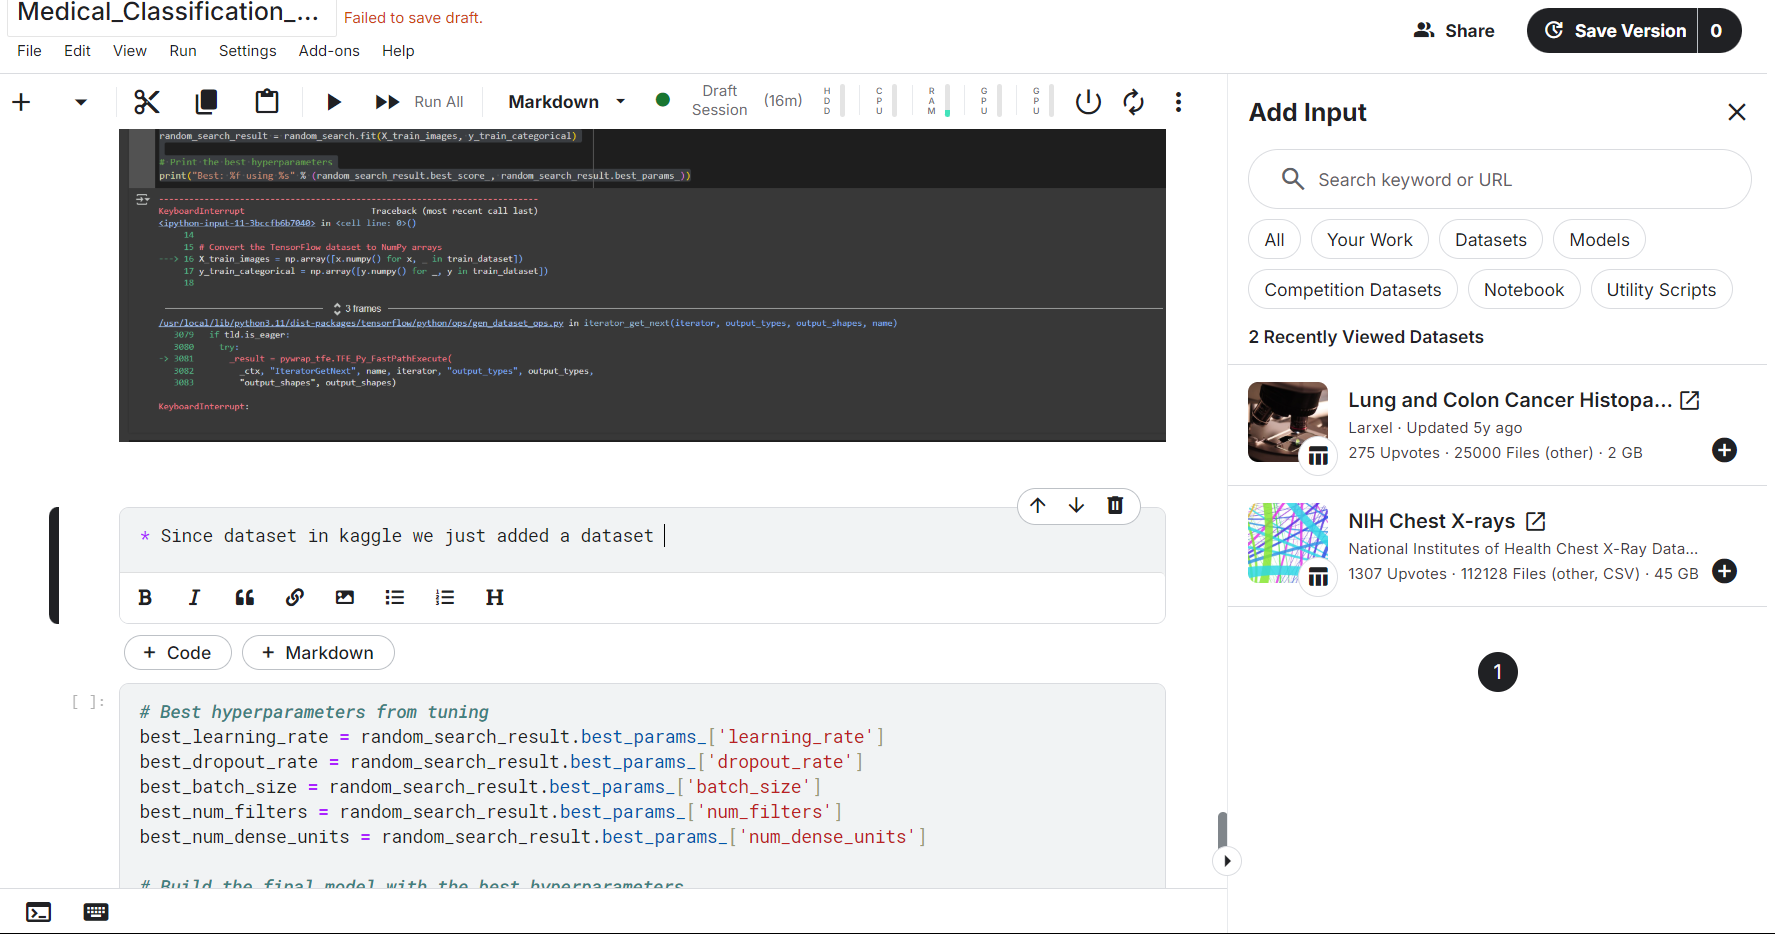

In [ ]:
# Load and display the image
image = Image.open("/kaggle/input/image-dataset/image_2025-03-01_104957671.png")
display(image)

dataset_path = "/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets"

# We modified the build_cnn_model function to accept hyperparameters

In [ ]:
def build_cnn_model(input_shape=(224, 224, 3), num_classes=3, learning_rate=0.001, dropout_rate=0.5, num_filters=32, num_dense_units=64):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Add Input layer

    # Convolutional layers
    model.add(layers.Conv2D(num_filters, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(num_filters * 2, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(num_filters * 4, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(num_filters * 8, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Global Average Pooling
    model.add(layers.GlobalAveragePooling2D())

    # Dropout layer
    model.add(layers.Dropout(dropout_rate))

    # Dense layer
    model.add(layers.Dense(num_dense_units, activation='relu'))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax', dtype='float32'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# And we run the RandomizedSearchCV Again

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.layers import Input

# Function to load and preprocess an image
def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])  # Resize images to 224x224
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = data_augmentation(img)  # Apply data augmentation
    return img, label

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_categorical))
train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Convert the TensorFlow dataset to NumPy arrays
X_train_images = np.array([x.numpy() for x, _ in train_dataset])
y_train_categorical = np.array([y.numpy() for _, y in train_dataset])

# Check the shapes
print("X_train_images shape:", X_train_images.shape)
print("y_train_categorical shape:", y_train_categorical.shape)

# Define the Hyperparameter Space
param_dist = {
    'learning_rate': [0.001, 0.0001, 0.00001],  # Learning rates to try
    'dropout_rate': [0.3, 0.5, 0.7],            # Dropout rates to try
    'batch_size': [16, 32, 64],                 # Batch sizes to try
    'num_filters': [32, 64, 128],               # Number of filters in convolutional layers
    'num_dense_units': [64, 128, 256]           # Number of units in dense layers
}

# Wrap the model for use with scikit-learn
model = KerasClassifier(build_fn=build_cnn_model, epochs=25, verbose=1)

# Perform random search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter combinations to try
    cv=3,       # Number of cross-validation folds
    verbose=1
)

# Fit the random search to the data
random_search_result = random_search.fit(X_train_images, y_train_categorical)

# Print the best hyperparameters
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

# Best hyperparameters from tuning
best_learning_rate = random_search_result.best_params_['learning_rate']
best_dropout_rate = random_search_result.best_params_['dropout_rate']
best_batch_size = random_search_result.best_params_['batch_size']
best_num_filters = random_search_result.best_params_['num_filters']
best_num_dense_units = random_search_result.best_params_['num_dense_units']

# Build the final model with the best hyperparameters
final_model = build_cnn_model(
    learning_rate=best_learning_rate,
    dropout_rate=best_dropout_rate,
    num_filters=best_num_filters,
    num_dense_units=best_num_dense_units
)

# Train the final model
history_final = final_model.fit(
    train_dataset,
    epochs=50,
    validation_data=test_dataset,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the final model
test_loss, test_accuracy = final_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

KeyboardInterrupt: 



* The issue persists because the KerasClassifier wrapper from scikeras is still not being recognized correctly by scikit-learn's RandomizedSearchCV. This is likely due to compatibility issues between the versions of TensorFlow, scikit-learn, and scikeras.

* To resolve this, we tried an alternative approach using Keras Tuner, which is specifically designed for hyperparameter tuning with TensorFlow/Keras models. This will avoid the compatibility issues with scikit-learn entirely.


# Keras Tuner

**Keras Tuner** is a library specifically designed for hyperparameter tuning in TensorFlow/Keras models. It automates the process of searching for the best hyperparameters by trying different combinations and evaluating their performance.

* **Number of Filters:**  We chose a range of 32 to 128 filters for the first layer, with the number of filters doubling in subsequent layers.

* **Number of Convolutional Layers:** We allowed the tuner to choose between 2 and 4 convolutional layers. This range is a good starting point for most image classification tasks.

* **Dropout Rate:** We chose a range of 0.3 to 0.7 for the dropout rate. A rate of 0.5 is commonly used, but the tuner can explore higher or lower values.

**Here:**

Keras Tuner will:

* Perform 10 trials (max_trials=10), meaning it will try 10 different hyperparameter combinations.

* Train each model for 25 epochs (epochs=25).

* Use Random Search to explore the hyperparameter space.



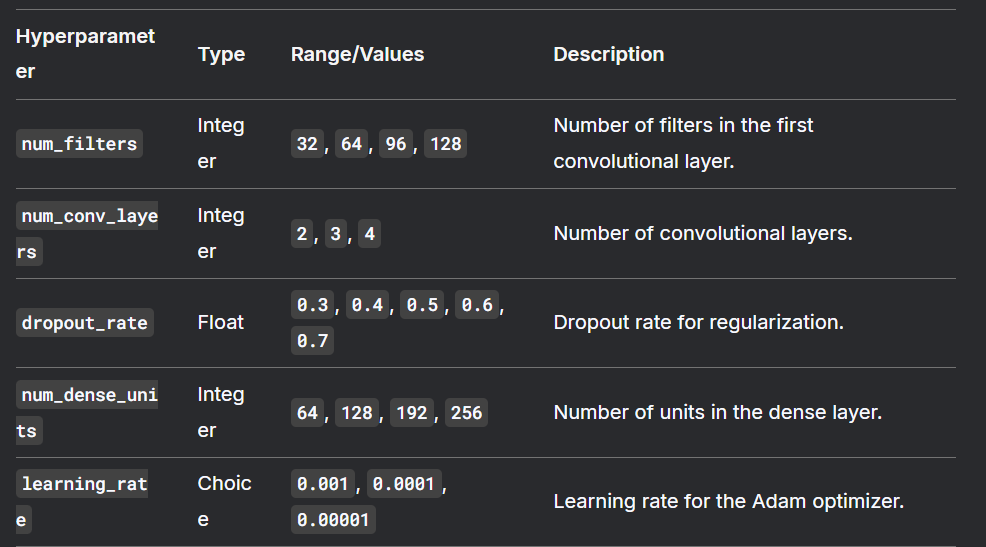

In [ ]:
# Load and display the image
image = Image.open("/kaggle/input/summary-hyperparameters/image_2025-03-01_125014463.png")
display(image)


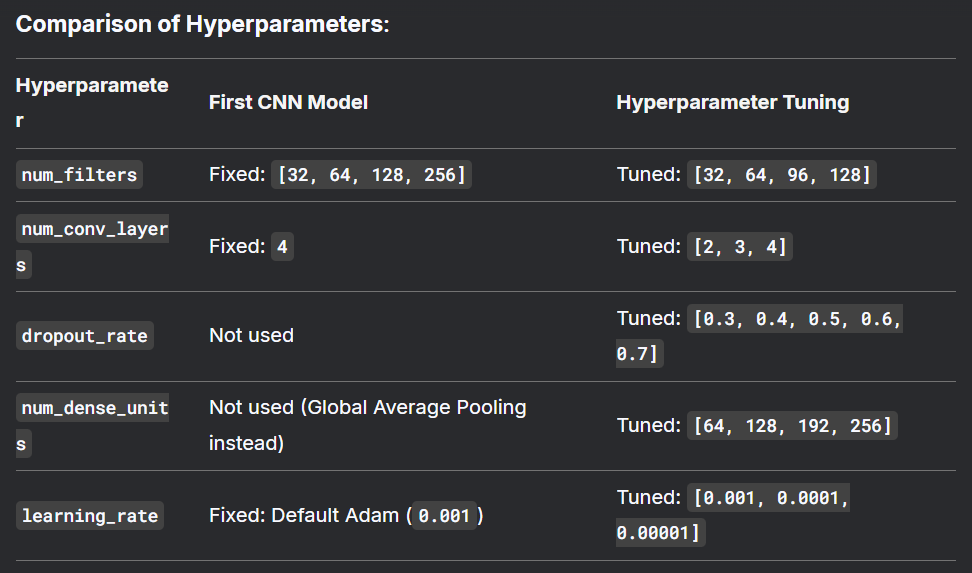

In [ ]:
# Load and display the image
image = Image.open("/kaggle/input/hyperparameters-between-first-cnn-model-and-tuning/image_2025-03-01_174440711.png")
display(image)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt

# Define dataset path
dataset_path = "/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets"

# Define lung classes and their corresponding folder names
lung_classes = {
    'lung_aca': 'Lung adenocarcinoma',
    'lung_n': 'Lung benign tissue',
    'lung_scc': 'Lung squamous cell carcinoma'
}

# Collect file paths and labels
file_paths = []
labels = []

for folder_name, class_name in lung_classes.items():
    class_path = os.path.join(dataset_path, folder_name)
    if os.path.exists(class_path):  # Check if the folder exists
        for file_name in os.listdir(class_path):
            file_paths.append(os.path.join(class_path, file_name))
            labels.append(class_name)
    else:
        print(f"Folder does NOT exist: {class_path}")

# Check if any files were found
if len(file_paths) == 0:
    raise ValueError("No files found in the specified folders. Please check the dataset structure.")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Encode labels
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform both training and testing labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoded format
y_train_categorical = to_categorical(y_train_encoded, num_classes=3)
y_test_categorical = to_categorical(y_test_encoded, num_classes=3)

# Print the shapes to verify
print("Training labels shape:", y_train_categorical.shape)
print("Testing labels shape:", y_test_categorical.shape)

# Enable mixed precision training
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Function to load and preprocess an image
def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])  # Resize images to 224x224
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = data_augmentation(img)  # Apply data augmentation
    return img, label

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_categorical))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_categorical))

# Map the preprocessing function to the datasets
train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# # Cache the datasets
# train_dataset = train_dataset.cache('train_cache')
# test_dataset = test_dataset.cache('test_cache')

# Batch and prefetch for better performance
batch_size = 64  # Increased batch size
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Convert the TensorFlow dataset to NumPy arrays
X_train_images = np.array([x.numpy() for x, _ in train_dataset])
y_train_categorical = np.array([y.numpy() for _, y in train_dataset])

# Check the shapes
print("X_train_images shape:", X_train_images.shape)
print("y_train_categorical shape:", y_train_categorical.shape)

for images, labels in train_dataset:
    X_train_images.extend(images.numpy())
    y_train_categorical.extend(labels.numpy())

# Convert lists to NumPy arrays
X_train_images = np.array(X_train_images)
y_train_categorical = np.array(y_train_categorical)

# Collect all images and labels from the testing dataset
X_test_images = []
y_test_categorical = []

for images, labels in test_dataset:
    X_test_images.extend(images.numpy())
    y_test_categorical.extend(labels.numpy())

# Convert lists to NumPy arrays
X_test_images = np.array(X_test_images)
y_test_categorical = np.array(y_test_categorical)

# Check the shapes
print("X_train_images shape:", X_train_images.shape)
print("y_train_categorical shape:", y_train_categorical.shape)
print("X_test_images shape:", X_test_images.shape)
print("y_test_categorical shape:", y_test_categorical.shape)

# Define the model-building function for Keras Tuner
def build_cnn_model(hp):
    model = Sequential()
    model.add(Input(shape=(224, 224, 3)))  # Input layer

    # Hyperparameters for the number of filters
    num_filters = hp.Int('num_filters', min_value=32, max_value=128, step=32)
    for i in range(hp.Int('num_conv_layers', min_value=2, max_value=4)):
        model.add(layers.Conv2D(num_filters * (2 ** i), (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Global Average Pooling
    model.add(layers.GlobalAveragePooling2D())

    # Dropout layer
    dropout_rate = hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)
    model.add(layers.Dropout(dropout_rate))

    # Dense layer
    num_dense_units = hp.Int('num_dense_units', min_value=64, max_value=256, step=64)
    model.add(layers.Dense(num_dense_units, activation='relu'))

    # Output layer
    model.add(layers.Dense(3, activation='softmax', dtype='float32'))

    # Compile the model
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.0001, 0.00001])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the Keras Tuner (RandomSearch)
tuner = kt.RandomSearch(
    build_cnn_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='keras_tuner_dir',  # Directory to save results
    project_name='lung_cancer_cnn'  # Project name
)

# Perform the hyperparameter search: Building and Training of the multiple models with different hyperparameter combinations
tuner.search(X_train_images, y_train_categorical,
             validation_data=(X_test_images, y_test_categorical),
             epochs=25,
             batch_size=64,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Learning Rate: {best_hps.get('learning_rate')}
- Number of Filters: {best_hps.get('num_filters')}
- Number of Conv Layers: {best_hps.get('num_conv_layers')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Number of Dense Units: {best_hps.get('num_dense_units')}
""")

Training set size: 12000
Testing set size: 3000
Training labels shape: (12000, 3)
Testing labels shape: (3000, 3)


KeyboardInterrupt: 

* It seems that the error we're encountering is a ResourceExhaustedError, which means our system ran out of memory (OOM - Out of Memory) while trying to train the model. (Here after working on the notebook we just mistakenly executed it again and stopped it knowing that it will take too long and ran out of Memory)

* Our dataset contains 15,000 images (5,000 per class), and each image is resized to 224x224x3. This requires a significant amount of memory.

* We're using a batch size of 64, which means the model processes 64 images at once. This can consume a lot of memory, especially during hyperparameter tuning when multiple models are being trained.

  **To fix this:**


  * We Reduced batch size to 32.
  * Enabled mixed precision training.
  * Added a callback to clear memory between trials.
  * Resized images to 128x128.

# And Building Best Model

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt
import shutil

# Define dataset path
dataset_path = "/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets"

# Define lung classes and their corresponding folder names
lung_classes = {
    'lung_aca': 'Lung adenocarcinoma',
    'lung_n': 'Lung benign tissue',
    'lung_scc': 'Lung squamous cell carcinoma'
}

# Collect file paths and labels
file_paths = []
labels = []

for folder_name, class_name in lung_classes.items():
    class_path = os.path.join(dataset_path, folder_name)
    if os.path.exists(class_path):  # Check if the folder exists
        for file_name in os.listdir(class_path):
            file_paths.append(os.path.join(class_path, file_name))
            labels.append(class_name)
    else:
        print(f"Folder does NOT exist: {class_path}")

# Check if any files were found
if len(file_paths) == 0:
    raise ValueError("No files found in the specified folders. Please check the dataset structure.")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Encode labels
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform both training and testing labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoded format
y_train_categorical = to_categorical(y_train_encoded, num_classes=3)
y_test_categorical = to_categorical(y_test_encoded, num_classes=3)

# Print the shapes to verify
print("Training labels shape:", y_train_categorical.shape)
print("Testing labels shape:", y_test_categorical.shape)

# Enable mixed precision training
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Reduce batch size
batch_size = 32

# Function to load and preprocess an image
def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [128, 128])  # Resize to 128x128
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = data_augmentation(img)  # Apply data augmentation
    return img, label

# Clear all cache directories
cache_dirs = ['train_cache', 'test_cache']
for cache_dir in cache_dirs:
    if os.path.exists(cache_dir):
        shutil.rmtree(cache_dir)
    os.makedirs(cache_dir)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_categorical))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_categorical))

# Map the preprocessing function to the datasets
train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# # Cache the datasets
# train_dataset = train_dataset.cache('train_cache')
# test_dataset = test_dataset.cache('test_cache')

# Batch and prefetch for better performance
batch_size = 32  # Increased batch size
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)


# Collect all images and labels from the training dataset
X_train_images = []
y_train_categorical = []

for images, labels in train_dataset:
    X_train_images.append(images.numpy())
    y_train_categorical.append(labels.numpy())

# Concatenate all batches into a single NumPy array
X_train_images = np.concatenate(X_train_images, axis=0)
y_train_categorical = np.concatenate(y_train_categorical, axis=0)

# Check the shapes
print("X_train_images shape:", X_train_images.shape)
print("y_train_categorical shape:", y_train_categorical.shape)

# Collect all images and labels from the testing dataset
X_test_images = []
y_test_categorical = []

for images, labels in test_dataset:
    X_test_images.append(images.numpy())
    y_test_categorical.append(labels.numpy())

# Concatenate all batches into a single NumPy array
X_test_images = np.concatenate(X_test_images, axis=0)
y_test_categorical = np.concatenate(y_test_categorical, axis=0)

# Check the shapes
print("X_test_images shape:", X_test_images.shape)
print("y_test_categorical shape:", y_test_categorical.shape)

# Define the model-building function for Keras Tuner
def build_cnn_model(hp):
    model = Sequential()
    model.add(Input(shape=(128, 128, 3)))  # Input layer expects 128x128 images

    # Hyperparameters for the number of filters
    num_filters = hp.Int('num_filters', min_value=32, max_value=128, step=32)
    for i in range(hp.Int('num_conv_layers', min_value=2, max_value=4)):
        model.add(layers.Conv2D(num_filters * (2 ** i), (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Global Average Pooling
    model.add(layers.GlobalAveragePooling2D())

    # Dropout layer
    dropout_rate = hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)
    model.add(layers.Dropout(dropout_rate))

    # Dense layer
    num_dense_units = hp.Int('num_dense_units', min_value=64, max_value=256, step=64)
    model.add(layers.Dense(num_dense_units, activation='relu'))

    # Output layer
    model.add(layers.Dense(3, activation='softmax', dtype='float32'))

    # Compile the model
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.0001, 0.00001])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the Keras Tuner (RandomSearch)
tuner = kt.RandomSearch(
    build_cnn_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='keras_tuner_dir',  # Directory to save results
    project_name='lung_cancer_cnn'  # Project name
)

# Clear memory between trials
import tensorflow as tf
import gc

def clear_memory():
    tf.keras.backend.clear_session()
    gc.collect()

class ClearMemoryCallback(tf.keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        clear_memory()

# Perform the hyperparameter search
tuner.search(
    X_train_images, y_train_categorical,
    validation_data=(X_test_images, y_test_categorical),
    epochs=25,
    batch_size=batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5), ClearMemoryCallback()]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Learning Rate: {best_hps.get('learning_rate')}
- Number of Filters: {best_hps.get('num_filters')}
- Number of Conv Layers: {best_hps.get('num_conv_layers')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Number of Dense Units: {best_hps.get('num_dense_units')}
""")

# Build the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()

Trial 10 Complete [00h 02m 53s]
val_accuracy: 0.8826666474342346

Best val_accuracy So Far: 0.9543333053588867
Total elapsed time: 01h 13m 26s

Best Hyperparameters:
- Learning Rate: 0.0001
- Number of Filters: 64
- Number of Conv Layers: 4
- Dropout Rate: 0.5
- Number of Dense Units: 256



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,683,075 (6.42 MB)

 Trainable params: 1,683,075 (6.42 MB)

 Non-trainable params: 0 (0.00 B)

# Plot Best Model

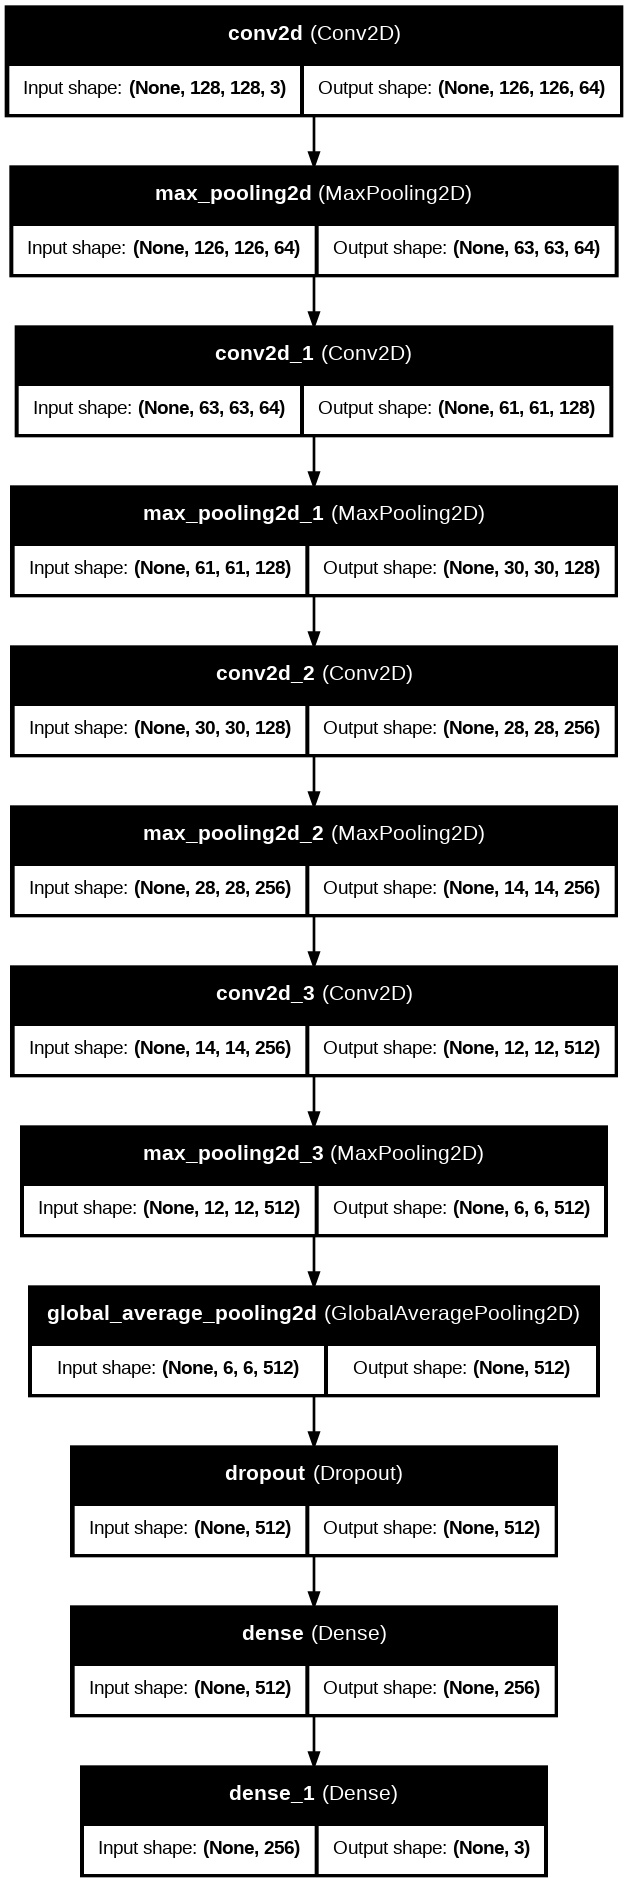

In [ ]:
# Plot the best model
plot_model(
    best_model,
    to_file='best_model.png',  # Save the plot to a file
    show_shapes=True,          # Show the shapes of the inputs/outputs
    show_layer_names=True,     # Show the names of the layers
    rankdir='TB',              # Layout: 'TB' for vertical, 'LR' for horizontal
    dpi=96,                    # Dots per inch for the image
    expand_nested=False        # Don't expand nested models (if any)
)


In [ ]:
# Train the best model
history = best_model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)]
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 65s 163ms/step - accuracy: 0.6861 - loss: 1.0818 - val_accuracy: 0.8760 - val_loss: 0.5486
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 154ms/step - accuracy: 0.8687 - loss: 0.5409 - val_accuracy: 0.8963 - val_loss: 0.4437
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - accuracy: 0.8808 - loss: 0.4701 - val_accuracy: 0.9047 - val_loss: 0.3920
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - accuracy: 0.8905 - loss: 0.4225 - val_accuracy: 0.9133 - val_loss: 0.3585
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - accuracy: 0.8973 - loss: 0.3843 - val_accuracy: 0.9100 - val_loss: 0.3363
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 153ms/step - accuracy: 0.9020 - loss: 0.3662 - val_accuracy: 0.9170 - val_loss: 0.3156
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 156ms/step - accuracy: 0.9076 - loss: 0.3450 - val_accuracy: 0.9173 - val_loss: 0.3055
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - accuracy: 0.9151 - loss: 0

# Best Model Evaluation

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9407 - loss: 0.1850
Test Loss: 0.1725386381149292
Test Accuracy: 0.9516666531562805
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step


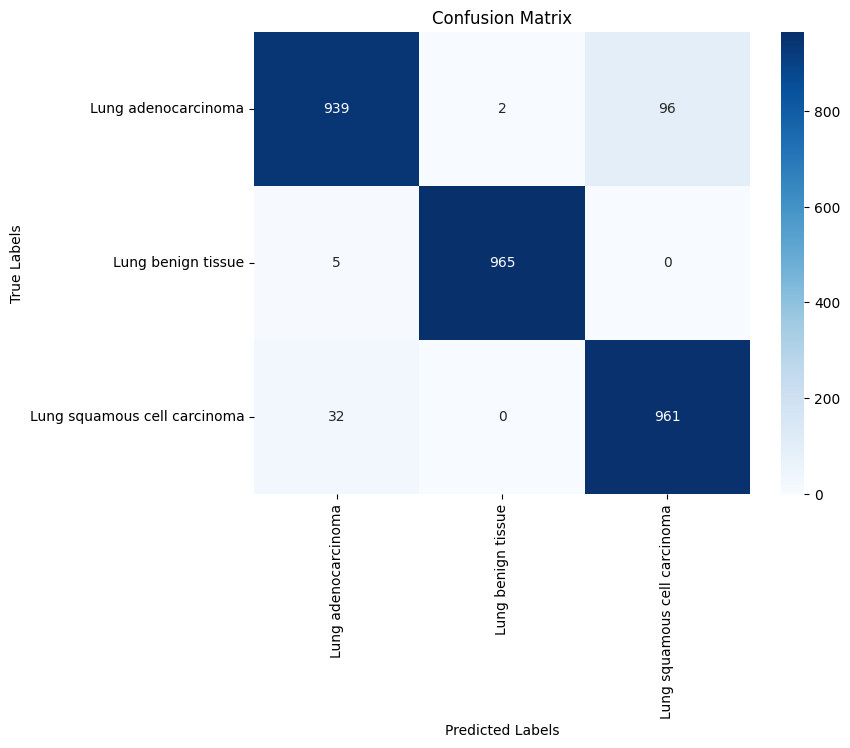

Classification Report:
                               precision    recall  f1-score   support

         Lung adenocarcinoma       0.96      0.91      0.93      1037
          Lung benign tissue       1.00      0.99      1.00       970
Lung squamous cell carcinoma       0.91      0.97      0.94       993

                    accuracy                           0.95      3000
                   macro avg       0.96      0.96      0.96      3000
                weighted avg       0.96      0.95      0.95      3000



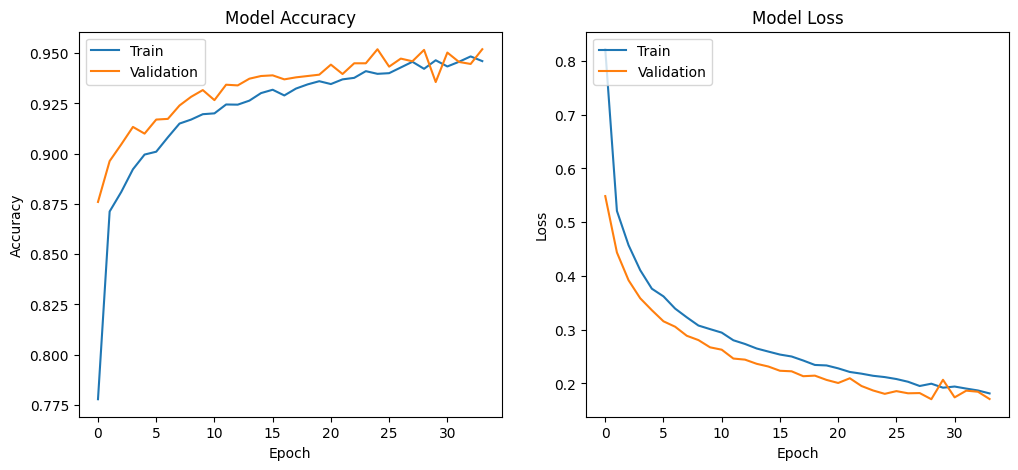

In [ ]:
# Step 1: Evaluate on the test set
test_loss, test_accuracy = best_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Step 2: Generate predictions
y_pred = best_model.predict(test_dataset)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_categorical, axis=1)

# Step 3: Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lung_classes.values(), yticklabels=lung_classes.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_true_labels, y_pred_labels, target_names=lung_classes.values())
print("Classification Report:\n", class_report)

# Step 5: Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Our model has achieved excellent performance on the test set, with high accuracy, low loss, and strong class-specific metrics. The confusion matrix and classification report provide valuable insights into the model's behavior, and the training/validation curves confirm that the model is well-trained and generalizes well**

# After Hyperparameter tuning Comparison

**The Current Model is a significant improvement over the First Model**, with:

* Higher accuracy and lower loss.

* Better class-specific performance (precision, recall, F1-score).

* Fewer misclassifications.

* More stable training.

These improvements make the Current Model more reliable and suitable for deployment.

# Pretrained Model: ResNet50

**Why ResNet50?**
* **Proven Performance:**

ResNet50 is widely used in medical imaging tasks and has achieved state-of-the-art results on many datasets, including ImageNet.

Its residual connections help train very deep networks (50 layers) without suffering from vanishing gradients.

* **Transfer Learning:**

* ResNet50 is pretrained on ImageNet, which contains over 1 million images across 1,000 classes. This pretraining helps the model learn general features (e.g., edges, textures, shapes) that can be fine-tuned for our specific task.

* Transfer Learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. It is particularly useful when the second task has limited data or computational resources.

* **Efficiency:**

ResNet50 strikes a good balance between depth and computational efficiency. It’s deeper than VGG but less computationally expensive than very large models like ResNet152 or EfficientNet-B7.

* **Medical Imaging Applications:**

ResNet50 has been successfully applied to medical imaging tasks, including histopathological image analysis, due to its ability to capture both low-level and high-level features.

**How Transfer Learning Works:**
* **Select a Pretrained Model:**

Choose a model that has been trained on a large, diverse dataset (e.g., VGG, ResNet, EfficientNet).

**Remove the Final Layers:**

Remove the final classification layers of the pretrained model, as they are specific to the original task.

**Add New Layers:**

Add new layers that are tailored to our specific task (e.g., a new classification layer for our dataset’s classes).

**Freeze Initial Layers:**

Freeze the initial layers of the pretrained model to retain the general features it has learned.

**Train the New Layers:**

Train the new layers on our dataset. This allows the model to learn task-specific features.

**Fine-Tune:**

Unfreeze some of the earlier layers and fine-tune the entire model on our dataset.

# Step 1: Load the Pretrained Model:

* Load the ResNet50 model with weights pretrained on ImageNet.

* Set include_top=False to exclude the fully connected layers at the top of the network.

* Specify the input shape as (224, 224, 3) to match our image size.

In [ ]:
# Load ResNet50 with pretrained weights (exclude top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


# Step 2: Freeze the Base Model
Freeze the layers of the base model to prevent them from being updated during initial training. This allows the model to retain the general features learned from ImageNet.

In [ ]:
# Step 2: Freeze the base model (pretrained layers)
base_model.trainable = False

# Step 3: Add Custom Layers:
* Added a Global Average Pooling layer to reduce the spatial dimensions of the feature maps.

* Added a fully connected layer with 256 units and ReLU activation.

* Added an output layer with 3 units (one for each class) and softmax activation for multi-class classification.

* **Dataset Size:**

Our dataset has 15,000 images, which is medium-sized. A dense layer with 256 units provides enough capacity without overfitting.

* **Task Complexity:**

Classifying histopathological images requires capturing both low-level and high-level features. The combination of GAP and a dense layer helps achieve this.

* **Efficiency:**

GAP reduces the number of parameters, making the model more efficient and easier to train.

* **Transfer Learning Best Practices:**

These choices align with best practices for transfer learning, where pretrained models are adapted to new tasks by adding a few custom layers.

# We can say in summary:

* **Global Average Pooling:**

Reduces spatial dimensions, prevents overfitting, and is efficient.

* **Fully Connected Layer with 256 Units:**

Provides enough capacity for our dataset without being overly complex.

* **Output Layer with 3 Units and Softmax:**

Suitable for multi-class classification with 3 classes.

In [ ]:
# Step 3: Add custom layers on top of the base model
x = base_model.output  # Output of the base model
x = GlobalAveragePooling2D()(x)  # Global Average Pooling to reduce spatial dimensions
x = Dense(256, activation='relu')(x)  # Fully connected layer with 256 units
predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Build the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast_25 (Cast)            │ (None, 128, 128, 3)    │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ cast_25[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

* The spatial dimensions shrink from 128x128 to 4x4 due to convolutional and pooling operations.

* The 2048 features represent high-level patterns learned by the model.

* The 256 units in the dense layer allow the model to learn combinations of these features.

* The 3 outputs correspond to the 3 classes in our classification task.

**Number of Layers:**
* ResNet50 Base Model: 175 layers (including convolutional, batch normalization, activation, and pooling layers).

* Custom Layers: 3 layers (Global Average Pooling, Dense with 256 units, and Dense with 3 units).

* Total Layers: 178 layers.

*
**Parameters:**

  
* **Total Parameters: 24,113,027**

These are the total number of weights and biases in the model.

* **Trainable Parameters: 525,315**

These are the parameters in the custom layers (Global Average Pooling, Dense layers) that are updated during training.

* **Non-Trainable Parameters: 23,587,712**

These are the parameters in the frozen ResNet50 base model that are not updated during training.



# Model Training

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,         # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best weights when stopping
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,         # Reduce learning rate by a factor of 0.2
    patience=3,         # Wait for 3 epochs before reducing the learning rate
    min_lr=1e-6         # Minimum learning rate
)

# Step 9: Train the model
history = model.fit(
    train_dataset,  # Training data
    epochs=50,      # Number of epochs
    validation_data=test_dataset,  # Validation data
    callbacks=[early_stopping, reduce_lr]  # Callbacks for early stopping and learning rate reduction
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 69s 150ms/step - accuracy: 0.4460 - loss: 1.0459 - val_accuracy: 0.5717 - val_loss: 0.8775 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 126ms/step - accuracy: 0.6153 - loss: 0.8331 - val_accuracy: 0.6033 - val_loss: 0.8018 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 128ms/step - accuracy: 0.6638 - loss: 0.7467 - val_accuracy: 0.6533 - val_loss: 0.7181 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.6887 - loss: 0.6986 - val_accuracy: 0.7040 - val_loss: 0.6711 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.7124 - loss: 0.6555 - val_accuracy: 0.7420 - val_loss: 0.6013 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 129ms/step - accuracy: 0.7119 - loss: 0.6431 - val_accuracy: 0.7447 - val_loss: 0.5908 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 128ms/step - accuracy: 0.7

# Model Evaluation

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.7761 - loss: 0.5143
Test Loss: 0.5029321908950806
Test Accuracy: 0.7839999794960022
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step
Classification Report:
                              precision    recall  f1-score   support

         Lung adenocarcinoma       0.71      0.70      0.71      1037
          Lung benign tissue       0.87      0.85      0.86       970
Lung squamous cell carcinoma       0.80      0.83      0.82       993

                    accuracy                           0.79      3000
                   macro avg       0.79      0.80      0.79      3000
                weighted avg       0.79      0.79      0.79      3000



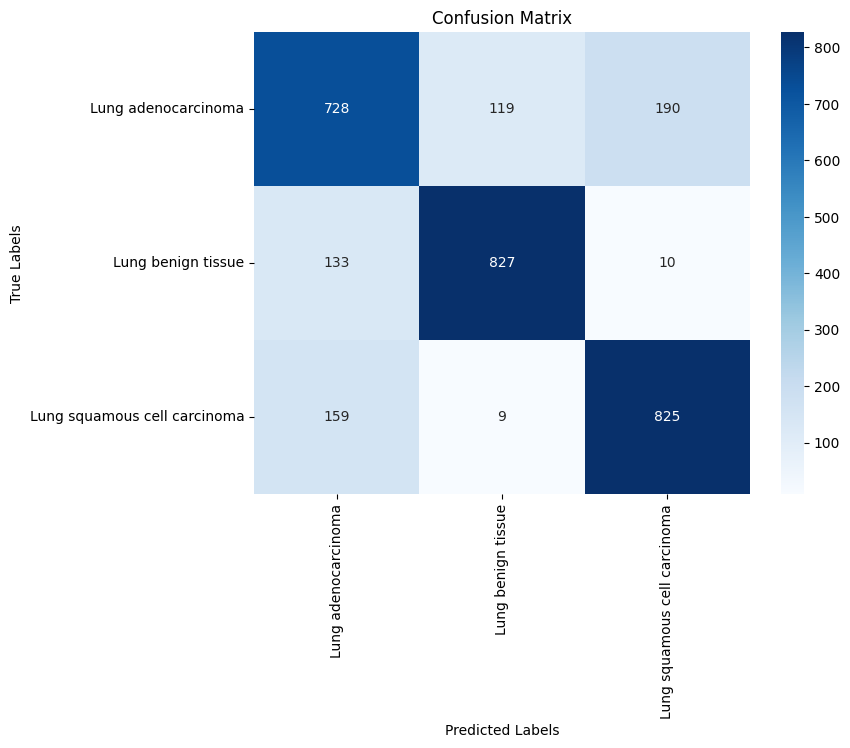

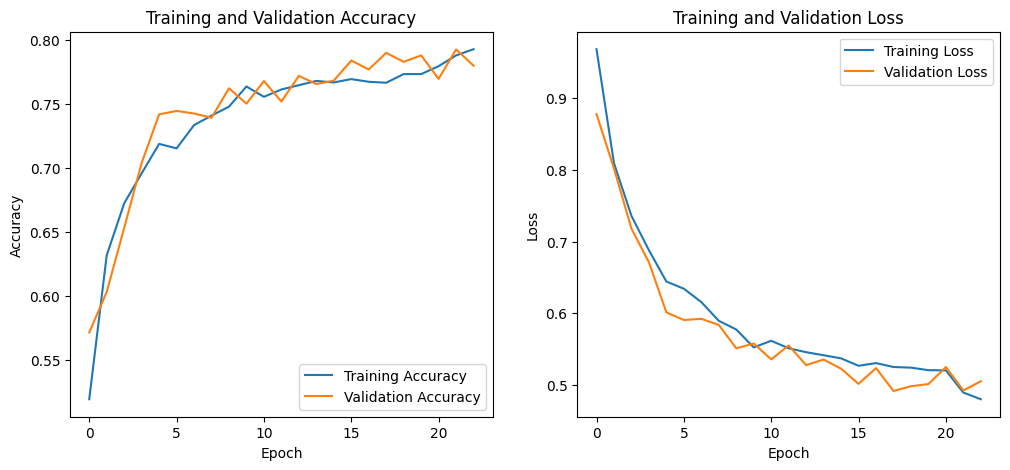

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions for the test dataset
predictions = model.predict(test_dataset)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the test dataset
true_labels = np.concatenate([y for _, y in test_dataset], axis=0)
true_labels = np.argmax(true_labels, axis=1)  # Convert one-hot encoded labels to class indices

from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)

print("Classification Report:")
print(class_report)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

model.save('lung_cancer_resnet50_model.h5')

# Fine-Tuning

Once the initial training is complete, we can fine-tune the model by unfreezing some of the later layers of the base model:

**Fine-Tuning:** Fine-tuning should further improve the model’s performance by adapting the pretrained layers to our specific dataset.
* Fine-tuning involves unfreezing later layers and retraining them with a lower learning rate.

* This allows the model to learn task-specific features while preserving general features from pretraining.

* Fine-tuning often leads to better performance and improved generalization.

* We’re unfreezing the last 20 layers of the ResNet50 base model.

* These layers are closer to the output and are responsible for learning more task-specific features.

* By unfreezing and retraining the later layers, the model can learn features that are more specific to our dataset (e.g., lung cancer histopathological images).

* This improves the model’s ability to distinguish between the classes in our dataset.

**Why 20 Epochs?**
* Fine-tuning typically requires fewer epochs than initial training because the model is already close to a good solution.

* We  use early stopping to prevent overfitting and stop training if the validation loss stops improving.

In [ ]:
# Unfreeze some of the later layers of the base model
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

# Recompile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_dataset,
    epochs=20,  # Train for a few more epochs
    validation_data=test_dataset,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 72s 146ms/step - accuracy: 0.6225 - loss: 3.7970 - val_accuracy: 0.3700 - val_loss: 5.8251 - learning_rate: 1.0000e-05
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 136ms/step - accuracy: 0.7859 - loss: 0.6703 - val_accuracy: 0.8243 - val_loss: 0.4421 - learning_rate: 1.0000e-05
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 135ms/step - accuracy: 0.8162 - loss: 0.4452 - val_accuracy: 0.8553 - val_loss: 0.3611 - learning_rate: 1.0000e-05
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.8382 - loss: 0.3825 - val_accuracy: 0.8467 - val_loss: 0.3807 - learning_rate: 1.0000e-05
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 133ms/step - accuracy: 0.8425 - loss: 0.3699 - val_accuracy: 0.8360 - val_loss: 0.4044 - learning_rate: 1.0000e-05
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.8522 - loss: 0.3569 - val_accuracy: 0.8627 - val_loss: 0.3282 - learning_rate: 1.0000e-05
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 13

# Model Evaluation

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8964 - loss: 0.2539
Test Loss (Fine-Tuned): 0.2553136944770813
Test Accuracy (Fine-Tuned): 0.8953333497047424
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step
Classification Report (Fine-Tuned):
                              precision    recall  f1-score   support

         Lung adenocarcinoma       0.84      0.87      0.86      1037
          Lung benign tissue       0.97      0.97      0.97       970
Lung squamous cell carcinoma       0.89      0.85      0.87       993

                    accuracy                           0.90      3000
                   macro avg       0.90      0.90      0.90      3000
                weighted avg       0.90      0.90      0.90      3000



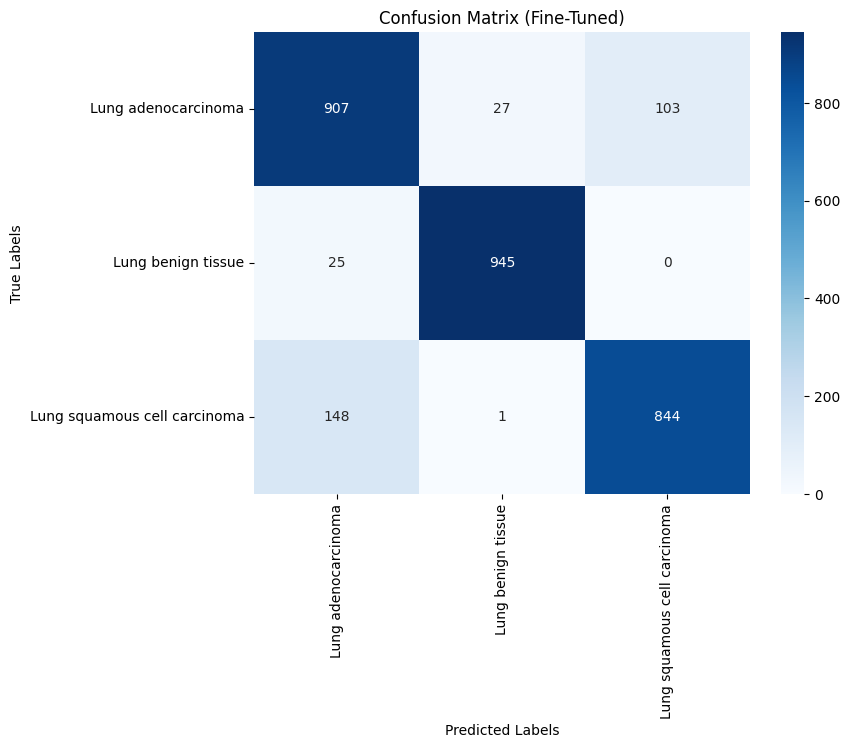

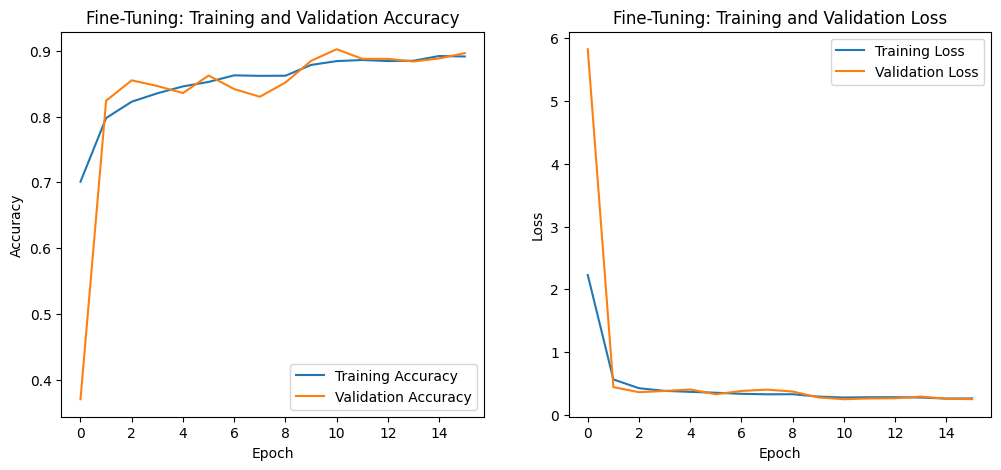

In [ ]:
# Evaluate the fine-tuned model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Loss (Fine-Tuned): {test_loss}")
print(f"Test Accuracy (Fine-Tuned): {test_accuracy}")

# Generate predictions for the test dataset
predictions = model.predict(test_dataset)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the test dataset
true_labels = np.concatenate([y for _, y in test_dataset], axis=0)
true_labels = np.argmax(true_labels, axis=1)  # Convert one-hot encoded labels to class indices

from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)

print("Classification Report (Fine-Tuned):")
print(class_report)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Fine-Tuned)')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Fine-Tuning: Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Fine-Tuning: Training and Validation Loss')
plt.legend()

plt.show()

model.save('fine_tuned_lung_cancer_resnet50_model.h5')

**Overall, the model demonstrates robust performance in distinguishing between Lung adenocarcinoma, Lung benign tissue, and Lung squamous cell carcinoma, with high accuracy and balanced precision and recall across all classes.**

* Fine-tuning significantly improved the model's performance across all metrics: accuracy, loss, precision, recall, and F1-score.

* The model became better at distinguishing between Lung adenocarcinoma, Lung benign tissue, and Lung squamous cell carcinoma, with fewer misclassifications.

* The most notable improvements were in Lung adenocarcinoma classification, where precision, recall, and F1-score all increased significantly.

* Overall, fine-tuning helped the model achieve a more robust and reliable performance.

# Comparison & Analysis

# Metrics

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


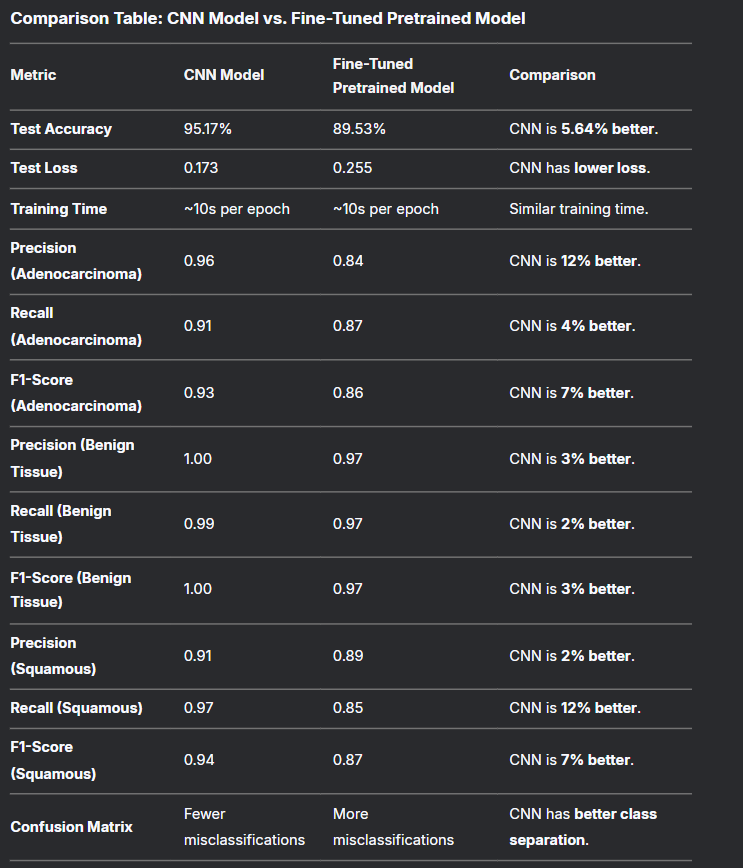

In [ ]:
# Load and display the image
image = Image.open("/kaggle/input/comparison-cnn-and-pretrained-model/image_2025-03-02_174637141.png")
display(image)

# Performance Analysis
**Accuracy and Loss:**

* The CNN model achieved a higher test accuracy (95.17%) compared to the fine-tuned pretrained model (89.53%). This indicates that the CNN model generalizes better to the test data.

* The CNN model also has a lower test loss (0.173) compared to the pretrained model (0.255), suggesting that its predictions are closer to the true labels.

**Precision, Recall, and F1-Score:**

* The CNN model outperforms the pretrained model across all classes in terms of precision, recall, and F1-score.

* The most significant improvements are in Lung adenocarcinoma and Lung squamous cell carcinoma, where the CNN model shows better precision and recall. This suggests that the CNN model is better at distinguishing between these two classes, which are often more challenging to classify.

**Confusion Matrix:**

* The CNN model has fewer misclassifications compared to the pretrained model. For example:

* For Lung adenocarcinoma, the CNN model misclassified only 96 cases, while the pretrained model misclassified 148 cases.

* For Lung benign tissue, the CNN model had almost perfect classification, misclassifying only 2 cases, compared to 27 in the pretrained model.

* This indicates that the CNN model has better class separation and is more robust in handling inter-class similarities.

**Training and Validation Curves:**

* The CNN model shows a steady increase in accuracy and a decrease in loss over epochs, indicating effective learning.

* The pretrained model also shows good performance, but the CNN model achieves higher accuracy and lower loss, suggesting that hyperparameter tuning and architecture design played a significant role in its success.

# Insights

**Why CNN Outperformed the Pretrained Model:**

* The CNN model fine-tuned with an architecture and hyperparameters specifically optimized for this dataset, leading to better performance.

* Pretrained models, while powerful, may not always adapt perfectly to specific datasets, especially when the dataset is large and diverse (like this one with 5000 images per class).

**Strengths of the CNN Model:**

* Higher accuracy and lower loss.

* Better precision, recall, and F1-scores across all classes.

* Fewer misclassifications, especially for challenging classes like Lung adenocarcinoma and Lung squamous cell carcinoma.

  **Strengths of the Pretrained Model:**

* Pretrained models are often faster to train and require less hyperparameter tuning.

* They can be useful when the dataset is smaller or when computational resources are limited.

**For this specific dataset, the CNN model is the better choice due to its superior performance.**

# **Conclusion**

**The CNN model outperformed the fine-tuned pretrained model in all key metrics, demonstrating its effectiveness for this specific medical image classification task.**

**The results highlight the importance of hyperparameter tuning and architecture design in achieving high performance for complex datasets like this one.**

# What we learned
**For Large Datasets:**

* If we have a large and diverse dataset (like ours), building and fine-tuning a CNN from scratch is likely the better choice, as it allows for greater customization and optimization.

**For Small Datasets:**

* If we work with smaller datasets in the future, we consider using pretrained models with transfer learning. They can achieve good performance with less data and computational effort.

For our specific task and dataset, creating and fine-tuning a CNN model from scratch was the better choice, as it outperformed the pretrained model in all key metrics. However, pretrained models remain a powerful tool, especially for smaller datasets or when computational resources are limited. The choice ultimately depends on the dataset size, task complexity, and available resources.